# Notebook Menu
1. [Data preparation and analysis](#1.-Data-preparation-and-analysis)
    1. [1.1. General analysis](#1.1.-General-analysis)
    1. [1.2. Counting unique values in 'Unnamed: 0' and 'id' columns](#1.2.-Counting-unique-values-in-'Unnamed:-0'-and-'id'-columns)
    1. [1.3. Analyzing the 'Age' column](#1.3.-Analyzing-the-'Age'-column)
    1. [1.4. Investigating low representation of 0 values](#1.4.-Investigating-low-representation-of-0-values)
    1. [1.5. Formatting column names and string values in one style](#1.5.-Formatting-column-names-and-string-values-in-one-style)
    1. [1.6. Checking the default model](#1.6.-Checking-the-default-model)
    1. [1.7. Feature encoding](#1.7.-Feature-encoding)
        1. [1.7.1. Encoding categorical features that have two unique values into 0 and 1](#1.7.1.-Encoding-categorical-features-that-have-two-unique-values-into-0-and-1)
        1. [1.7.2. Label encoding of target values](#1.7.2.-Label-Encoding-of-target-values)
        1. [1.7.3. Dataset split and class feature frequency encoding](#1.7.3.-Dataset-split-and-class-feature-frequency-encoding)
2. [Checking different models](#2.-Checking-different-models)
    1. [2.1. Data preparation](#2.1.-Data-preparation)
        1. [2.1.1. Filling missing values in the 'Arrival_delay_in_minutes' column](#2.1.1.-Filling-missing-values-in-the-'Arrival-delay-in-minutes'-column)
        2. [2.1.2. Normalize data for SGDClassifier](#2.1.2.-Normalize-data-for-SGDClassifier)
    2. [2.2. Model comparison](#2.2.-Model-comparison)
3. [Feature analysis and enhancement](#3.-Feature-analysis-and-enhancement)
    1. [3.1. Exploring feature importance and dependencies](#3.1.-Exploring-feature-importance-and-dependencies)
        1. [3.1.1. Deleting the gender column](#3.1.1.-Deleting-the-Gender-column)
        2. [3.1.2. Creating Age_groups instead of the 'Age' column](#3.1.2.-Creating-Age-groups-instead-of-the-'Age'-column)
    2. [3.2. New features](#3.2.-New-features)
        1. [3.2.1. Combine 'Customer_type' and 'Type_of_travel' in the new feature](#3.2.1.-Combine-'Customer-type'-and-'Type-of-travel'-in-the-new-feature)
        2. [3.2.2. Count the number of each type of rating per passenger](#3.2.2.-Count-the-number-of-each-type-of-rating-per-passenger)
    3. [3.3. Feature selection](#3.3.-Feature-selection)
4. [Training model](#4.-Training-model)
    1. [4.1. Hyperparameter tuning](#4.1.-Hyperparameter-tuning)
    2. [4.2. Final model](#4.2.-Final-model)
5. [Test data preparation and testing the best model on it](#5.-Test-data-preparation-and-testing-the-best-model-on-it)
    1. [5.1. Prepare test set](#5.1.-Prepare-test-set)
        1. [5.1.1. Test set exploration](#5.1.1.-Test-set-exploration)
        2. [5.1.2. Deleting the 'Unnamed: 0' and 'id' columns](#5.1.2.-Deleting-the-'Unnamed:-0'-and-'id'-columns)
        3. [5.1.3. Formatting column names and string values in one style](#5.1.3.-Formatting-column-names-and-string-values-in-one-style)
        4. [5.1.4. Feature encoding](#5.1.4.-Feature-encoding)
        5. [5.1.5. Creating 'Class_fr' column](#5.1.5.-Creating-'Class_fr'-column)
        6. [5.1.6. Creating new column 'Age_groups' and exclude 'Age' column](#5.1.6.-Creating-new-column-'Age-groups'-and-exclude-'Age'-column)
        7. [5.1.7. Creating 'XOR_Customer_Travel' column](#5.1.7.-Creating-'XOR_Customer_Travel'-column)
    2. [5.2. Testing the best model](#5.2.-Testing-the-best-model)
6. [Preparation for model deployment](#6.-Preparation-for-model-deployment)
    1. [6.1. Creating a dictionary to map original values with the numeric representation](#6.1.-Creating-a-dictionary-to-map-original-values-with-the-numeric-representation)
    2. [6.2. Creating a dictionary with aging groups and labels](#6.2.-Creating-a-dictionary-with-aging-groups-and-labels)
    3. [6.3. Saving the model and necessary variables for deployment](#6.3.-Saving-the-model-and-necessary-variables-for-deployment)


In [1]:
import pandas as pd
from pandas.api.types import is_string_dtype
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SequentialFeatureSelector

import lightgbm as lgb

from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

import shap

import time
from sklearn.model_selection import RandomizedSearchCV

import joblib

# 1. Data preparation and analysis
## 1.1. General analysis

Data source - https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

In [2]:
train_data_path = "model_trainig/data/train.csv"
full_train_set = pd.read_csv(train_data_path)

In [3]:
full_train_set.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
full_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
full_train_set.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [6]:
full_train_set[full_train_set.duplicated()]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


Based on the above results and the provided dataset information, the following conclusions can be drawn:
1. There are 103904 rows of passenger data without any duplications.
2. There is only one column with missing values - **'Arrival_delay_in_minutes'** - and the amount of these values is 310. Considering the dataset size, I suppose this number of missing values won't have a significant impact on the model predictions.
3. The dataset includes the following categorical features with nominal data:
    - **Gender** (Female, Male)
    - **Customer type** (Loyal customer, disloyal customer)
    - **Type of travel** (Personal Travel, Business Travel)
    - **Class** (Business, Eco, Eco Plus)
4. The **'satisfaction'** column contains target variables.

Next step in this data analysis - explore numeric values and data distribution.
In particular, I want to plot every feature distribution at once. Probably, I will need to do this operation more than once, so I create a function bar_plot_value_counts() for this purpose.

In [7]:
"""
    Create bar plots for the value counts of specified columns in a dataset.

    Parameters:
    - dataset (DataFrame): The dataset to analyze.
    - column_list (list): List of column names to create bar plots for.
    - num_columns (int): Number of columns in each row of subplots.

    Returns:
    - None (displays bar plots using Matplotlib)
"""
def bar_plot_value_counts(dataset, column_list, num_columns):
    if num_columns <= 1:
        return "num_columns must be greater than 1."
    # Calculate the number of rows with subplots
    num_rows = int(np.ceil(len(column_list) / num_columns))

    figure, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5*num_rows))

    # Calculate value counts for each column
    for i, column in enumerate(column_list):
        count_values = dataset[column].value_counts()

        row_idx = i // num_columns
        col_idx = i % num_columns
        
        # Plot if there are multiple rows
        if num_rows > 1:
            axes[row_idx, col_idx].bar(count_values.index, count_values.values)
            axes[row_idx, col_idx].set_xlabel(column)
            axes[row_idx, col_idx].set_ylabel('Count')
            axes[row_idx, col_idx].set_title(column + ' distribution')
            axes[row_idx, col_idx].grid(True, axis='y')
        
        # Plot if there is a single row
        else:
            axes[col_idx].bar(count_values.index, count_values.values)
            axes[col_idx].set_xlabel(column)
            axes[col_idx].set_ylabel('Count')
            axes[col_idx].set_title(column + ' distribution')
            axes[col_idx].grid(True, axis='y')

    plt.tight_layout()
    plt.show()


In [8]:
full_train_set.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


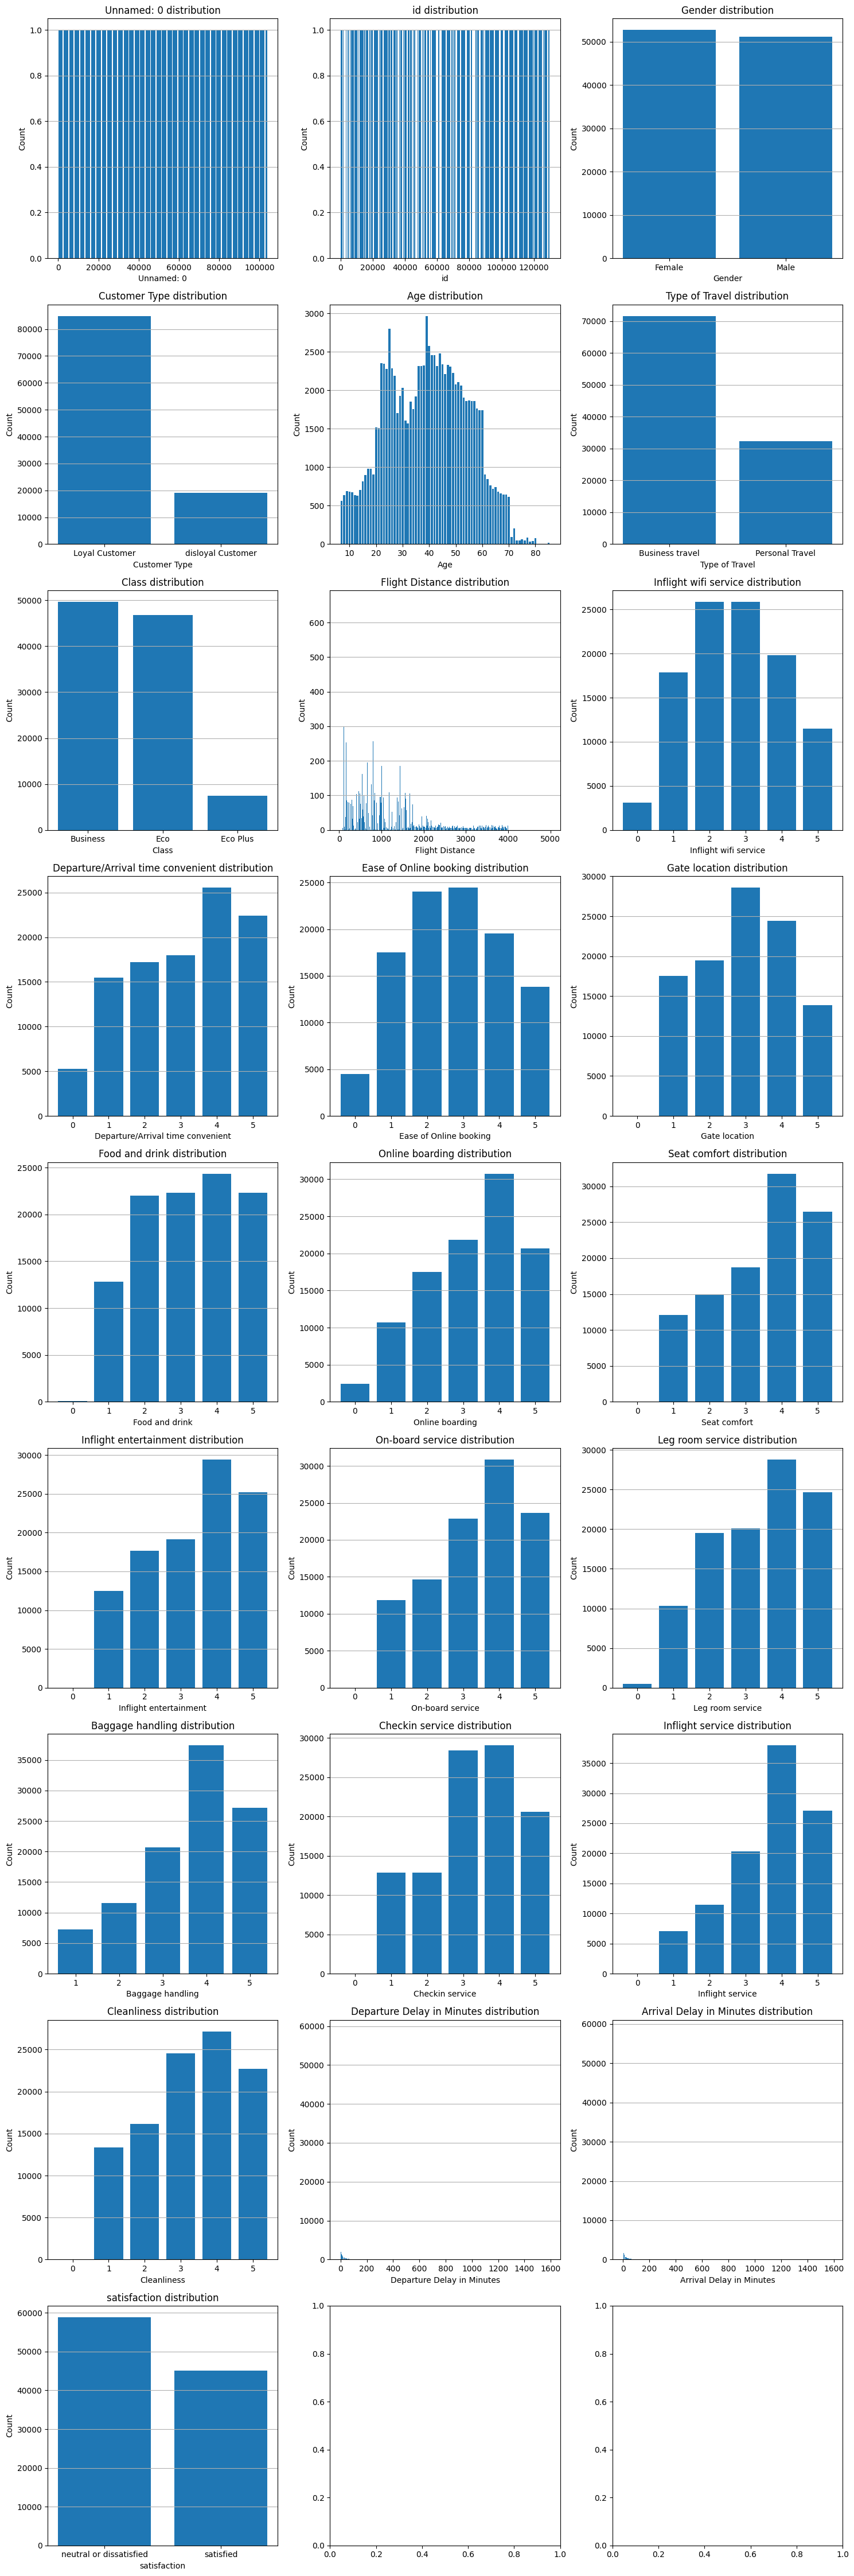

In [9]:
bar_plot_value_counts(full_train_set, list(full_train_set.columns), 3)

Based on the results of describe and bar_plot_value_counts functions, I can make additional conclusions about the data:
#### 1. Unnamed: 0 and id.
It seems that these columns act as identifiers and duplicate the index function. They don't provide meaningful information about airline passenger satisfaction. Moreover, these features are with high cardinality, which can slow down computations. I think the best way to deal with these columns - is to exclude them from the dataset. Before doing this, I would like to double-check if there are as many unique values in the 'Unnamed: 0' and 'id' columns each as rows in the dataset.
#### 2. 'Flight distance', 'Departure delay in minutes' and "Arrival delay in minutes'.
Data in these columns is skewed.
#### 3. Age.
The dataset has information about passengers from 7 to 85 years old.
It looks like there are very few passengers who are 80 years old or above. This fact needs to be inspected more thoroughly as a small representation of any age group could lead to wrong predictions for this group.
#### 4. Categorical features with ordinal data.
'Inflight wifi service', 'Departure/arrival time convenient', 'Ease of online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure delay in minutes', 'Arrival delay in minutes' are categorical features with ordinal data, that shows satisfaction level of each airline service on a scale from 0 to 5.

It is very few 0 values in the following columns: 'Gate location', 'Food and drink', 'Seat comfort', Inflight entertainment', 'On-board service', 'Leg room service', 'Checkin service', 'Inflight service' and 'Cleanliness'.
I want to inspect the last one features more to make any conclusions.

## 1.2. Counting unique values in 'Unnamed: 0' and 'id' columns

In [10]:
full_train_set['Unnamed: 0'].nunique()

103904

In [11]:
full_train_set['id'].nunique()

103904

'Unnamed: 0' and 'id' columns have unique values for each row, so, as was mentioned previously, the best way to deal with these columns is to exclude them from the dataset.

In [12]:
full_train_set.drop(labels = ['Unnamed: 0', 'id'], axis = 1, inplace = True)
full_train_set.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## 1.3. Analyzing the 'Age' column

I want to examine the representation of every age group in the dataset.
As a reminder of how the age distribution looks in this dataset, I have plotted the following graph.
I suppose counting the percentage of passengers in each age group will be more informative than just counting the number of values in each age group. 
As I plan to do the same operation with several other columns, I prefer to create a separate function  count_value_percentages() for this.

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


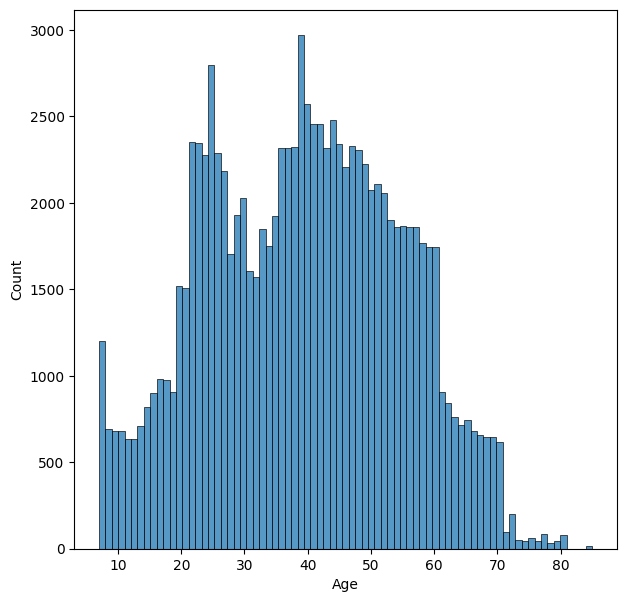

In [13]:
plt.figure(figsize = (7, 7))
res = sns.histplot(full_train_set['Age'])
plt.show()

In [14]:
"""
    Calculate the value counts and percentages of unique values in a specified column.
    
    Parameters:
    - data_set (DataFrame): The DataFrame containing the data.
    - column_name (str): The name of the column to analyze.
    
    Returns:
    - DataFrame: A DataFrame containing the values, counts, and percentages of unique values in the column.
"""
def count_value_percentages(data_set, column_name):
    number_of_values = data_set[column_name].value_counts()
    
    # number of all values in column.
    total = len(data_set) 
    
    percentages = (number_of_values / total) * 100
        
    result_df = pd.DataFrame({
            'Values': number_of_values.index,
            'Number of values': number_of_values.values,
            'Percentages': percentages.values
        })
    result_df.name = column_name
        
    return result_df

In [15]:
age_percentages_df = count_value_percentages(full_train_set, 'Age')
print(age_percentages_df.name)
age_percentages_df.sort_values(by=('Percentages'))[:15]

Age


,Values,Number of values,Percentages
74,85,17,0.016361
73,78,33,0.031760
72,79,42,0.040422
71,76,45,0.043309
70,74,47,0.045234
69,73,51,0.049084
68,75,61,0.058708
67,80,78,0.075069
66,77,87,0.083731
65,71,94,0.090468


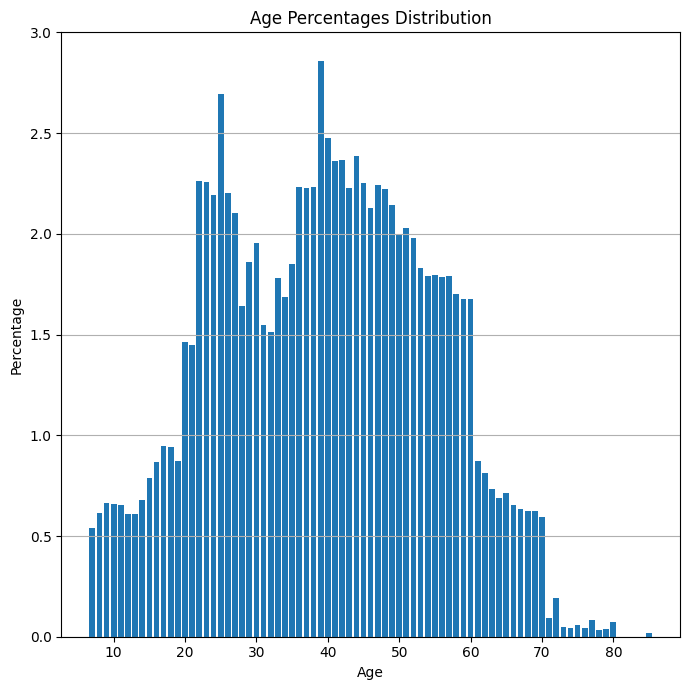

In [16]:
plt.figure(figsize = (7, 7))
plt.bar(age_percentages_df['Values'], age_percentages_df['Percentages'])
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('Age Percentages Distribution')

plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

The percentage of passengers of age 71 and above in the dataset is less than 0.1. 
I think such small representativeness of these passengers in the dataset can cause model overfitting or lead to inaccurate predictions for this category of passengers. To decide how to deal with the data in the 'Age' column I need to explore its impact on the model predictions.

## 1.4. Investigating low representation of 0 values

As it was previously mentioned in section "1.1. General analysis", it is very few 0 values in the following columns: 'Gate location', 'Food and drink', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Checkin service', 'Inflight service' and 'Cleanliness'.
To analyze these columns, I will use count_value_percentages() introduced in section "1.3. Analyzing the 'Age' column". This function allows me to explore the count and percentage of values within each column.

In [17]:
full_train_set.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [18]:
columns_to_inspect = ['Gate location', 'Food and drink', 'Seat comfort',
                      'Inflight entertainment', 'On-board service', 'Leg room service',
                      'Checkin service', 'Inflight service', 'Cleanliness']

In [19]:
for column in columns_to_inspect:
    result_df=count_value_percentages(full_train_set, column)
    print(result_df.name)
    display(result_df)

Gate location


,Values,Number of values,Percentages
0,3,28577,27.503272
1,4,24426,23.508238
2,2,19459,18.727864
3,1,17562,16.902140
4,5,13879,13.357522
5,0,1,0.000962


Food and drink


,Values,Number of values,Percentages
0,4,24359,23.443756
1,5,22313,21.474630
2,3,22300,21.462119
3,2,21988,21.161842
4,1,12837,12.354674
5,0,107,0.102980


Seat comfort


,Values,Number of values,Percentages
0,4,31765,30.571489
1,5,26470,25.475439
2,3,18696,17.993532
3,2,14897,14.337273
4,1,12075,11.621304
5,0,1,0.000962


Inflight entertainment


,Values,Number of values,Percentages
0,4,29423,28.317485
1,5,25213,24.265668
2,3,19139,18.419888
3,2,17637,16.974322
4,1,12478,12.009162
5,0,14,0.013474


On-board service


,Values,Number of values,Percentages
0,4,30867,29.707230
1,5,23648,22.759470
2,3,22833,21.975092
3,2,14681,14.129389
4,1,11872,11.425932
5,0,3,0.002887


Leg room service


,Values,Number of values,Percentages
0,4,28789,27.707307
1,5,24667,23.740183
2,3,20098,19.342855
3,2,19525,18.791384
4,1,10353,9.964005
5,0,472,0.454265


Checkin service


,Values,Number of values,Percentages
0,4,29055,27.963312
1,3,28446,27.377194
2,5,20619,19.844279
3,2,12893,12.408569
4,1,12890,12.405682
5,0,1,0.000962


Inflight service


,Values,Number of values,Percentages
0,4,37945,36.519287
1,5,27116,26.097167
2,3,20299,19.536303
3,2,11457,11.026524
4,1,7084,6.817832
5,0,3,0.002887


Cleanliness


,Values,Number of values,Percentages
0,4,27179,26.157800
1,3,24574,23.650678
2,5,22689,21.836503
3,2,16132,15.525870
4,1,13318,12.817601
5,0,12,0.011549


There are a tiny amount of 0 values in the abovementioned columns. I suppose it is better to leave these columns untouched cause all values in them show the different levels of airline services satisfaction. Thus, if I remove rows with zero values or regroup all values, thereby creating new scores, this may change the purpose and effect of the features on model training. But, of course, to make a final decision on the data in these columns, I need to explore their impact on the model predictions.

## 1.5. Formatting column names and string values in one style

In [20]:
full_train_set.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [21]:
# This function capitalizes column names and values in an input DataFrame, changes '-' and spaces into '_',
# and returns a DataFrame with formatted column names and values.

def format_column_names_and_values(df):
    df.columns = df.columns.str.capitalize().str.replace(' ', '_').str.replace('-','')
    df = df.apply(lambda x: x.str.capitalize() if x.dtype == 'O' else x)
    return df

In [22]:
full_train_set = format_column_names_and_values(full_train_set)
full_train_set.head()

,Gender,Customer_type,Age,Type_of_travel,Class,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,...,Inflight_entertainment,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Satisfaction
0,Male,Loyal customer,13,Personal travel,Eco plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,Neutral or dissatisfied
1,Male,Disloyal customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,Neutral or dissatisfied
2,Female,Loyal customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,Satisfied
3,Female,Loyal customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,Neutral or dissatisfied
4,Male,Loyal customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,Satisfied


## 1.6. Checking the default model
Before any feature encoding and creating new features, I need a starting point to compare with. This starting point is the LGBMClassifier model with all default parameters cause I am interested in how well the model can perform without additional steps in feature encoding or tuning model hyperparameters.

I choose LGBMclassifier as the default model because it is fast, can use categorical features without encoding, easily can handle skewed data, and NaNs with good results with the last ones.

Different data splitting can slightly but still affect model performance, so I will use one random seed every time I split the data to track the result of feature encoding and hyperparameter tuning.  Also, I will use the same random state when defining the model to obtain reproducible results.

For evaluating model performance, I use the F1-score method from scikit-learn library cause there is no f1 metric in lightgbm when creating this notebook. As for reasons for choosing the f1-score metric - the satisfaction column distribution is slightly imbalanced (shown on the barplot in section 1.1. General analysis), and the f1-score is good in dealing with such classes.

In [23]:
train_df, test_df = train_test_split(full_train_set, test_size=0.2, random_state=42)

In [24]:
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop = True)

In [25]:
for col in train_df.columns:
    col_type = train_df[col].dtype
    if col_type == 'object' or col_type.name == 'category':
        train_df[col] = train_df[col].astype('category')
        test_df[col] = test_df[col].astype('category')

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83123 entries, 0 to 83122
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Gender                             83123 non-null  category
 1   Customer_type                      83123 non-null  category
 2   Age                                83123 non-null  int64   
 3   Type_of_travel                     83123 non-null  category
 4   Class                              83123 non-null  category
 5   Flight_distance                    83123 non-null  int64   
 6   Inflight_wifi_service              83123 non-null  int64   
 7   Departure/arrival_time_convenient  83123 non-null  int64   
 8   Ease_of_online_booking             83123 non-null  int64   
 9   Gate_location                      83123 non-null  int64   
 10  Food_and_drink                     83123 non-null  int64   
 11  Online_boarding                    83123 

In [27]:
y_train = train_df.Satisfaction.values
del train_df['Satisfaction']

In [28]:
y_test = test_df.Satisfaction
del test_df['Satisfaction']

In [29]:
callbacks = [lgb.early_stopping(10, verbose=0), lgb.log_evaluation(period=0)]

In [30]:
LGBM_default = LGBMClassifier(random_state = 42)

In [31]:
LGBM_default.fit(train_df, y_train,
                 eval_set=[(test_df, y_test), (train_df, y_train)],
                 eval_names =['train_loss', 'val_loss'],
                 eval_metric='binary',
                 callbacks=callbacks)
y_pred_default = LGBM_default.predict(test_df)

f1 = f1_score(y_test, y_pred_default, pos_label='Satisfied')
f1

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


0.9572630398205272

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

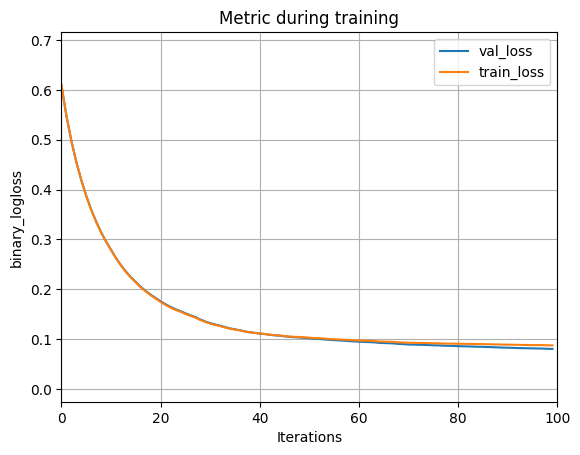

In [32]:
lgb.plot_metric(LGBM_default, metric='binary_logloss')

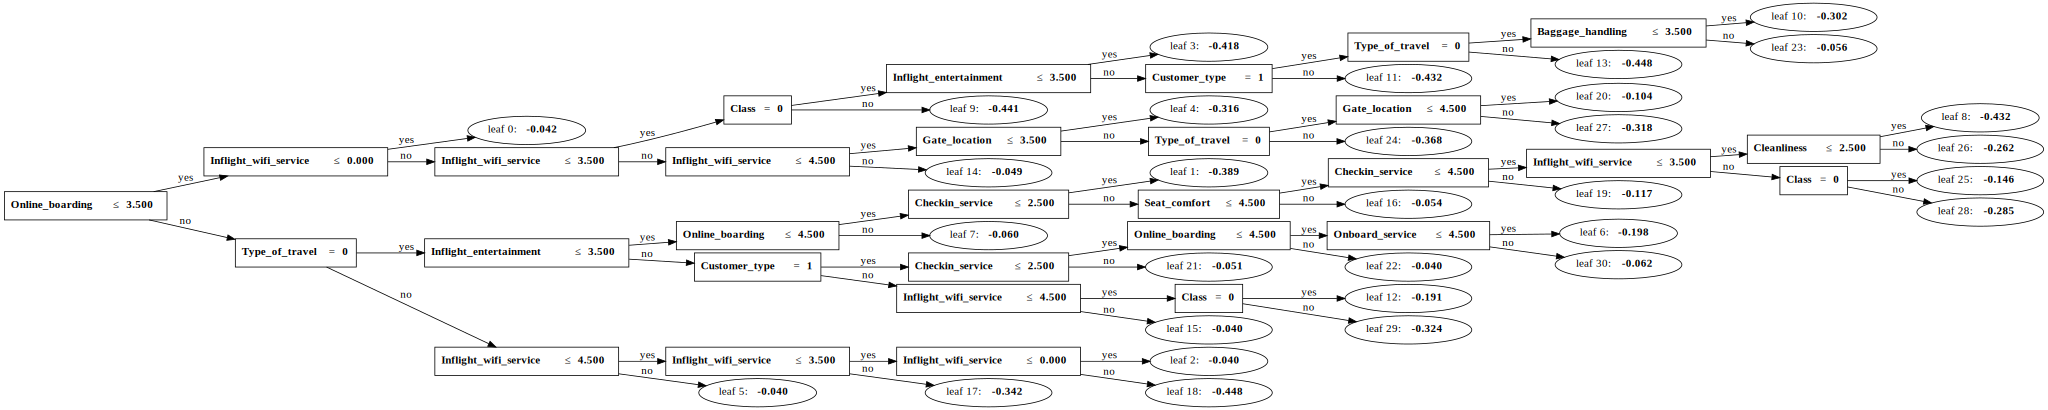

In [33]:
lgb.create_tree_digraph(LGBM_default.booster_)

The default model shows good results without hyperparameter tuning, probably because there are enough examples in the dataset, and the data quality is good.

Validation loss is slightly lower than training loss, this tiny difference doesn't bother me yet. However, I'll check the train and validation loss several more times.

I think most models will give pretty good results with this data, so I want to check if any model is faster with the same performance as the LGBMClassifier.

I plan to use SHAP to explore the effect each feature has on the predictions made by the model, including the decision on how to handle the Age feature.

Also, I want to find out if it is possible to use fewer features for the model and achieve the same performance result. For this purpose, I will use the SequentialFeatureSelector function from the scikit-learn library.
As all the functions above and most models can deal with categorical data if it has a numeric representation, I will encode all object-type values into numeric ones in the upcoming section before implementing all mentioned steps.

## 1.7. Feature encoding

### 1.7.1. Encoding categorical features that have two unique values into 0 and 1
To identify unique values in categorical features.

In [34]:
categorical_features = full_train_set.select_dtypes(include = 'object').columns
categorical_features

Index(['Gender', 'Customer_type', 'Type_of_travel', 'Class', 'Satisfaction'], dtype='object')

In [35]:
for feature in categorical_features:
    print(feature, full_train_set[feature].unique())

Gender ['Male' 'Female']
Customer_type ['Loyal customer' 'Disloyal customer']
Type_of_travel ['Personal travel' 'Business travel']
Class ['Eco plus' 'Business' 'Eco']
Satisfaction ['Neutral or dissatisfied' 'Satisfied']


Among the columns, 'Gender', 'Customer_type', and 'Type_of_travel' are the ones with two unique values. To encode these values into 0 and 1, I define the binary_replacement function below and create a dictionary with binary mappings.
As recommended by the scikit-learn documentation, for encoding target labels (i.e. the 'Satisfaction' column),  I use LabelEncoder. 

In [36]:
binary_mappings = {
    'Gender': {'Male': 0, 'Female': 1},
    'Customer_type': {'Loyal customer': 0, 'Disloyal customer': 1},
    'Type_of_travel': {'Personal travel': 0, 'Business travel': 1}
}

In [37]:
def binary_replacement(data_set, dictionary=binary_mappings):
    for column, mapping in dictionary.items():
        data_set[column] = data_set[column].replace(mapping)
    
    return data_set

In [38]:
full_train_set = binary_replacement(full_train_set)
full_train_set.head()

,Gender,Customer_type,Age,Type_of_travel,Class,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,...,Inflight_entertainment,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Satisfaction
0,0,0,13,0,Eco plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,Neutral or dissatisfied
1,0,1,25,1,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,Neutral or dissatisfied
2,1,0,26,1,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,Satisfied
3,1,0,25,1,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,Neutral or dissatisfied
4,0,0,61,1,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,Satisfied


### 1.7.2. Label Encoding of target values

In [39]:
label_encoder = LabelEncoder()
full_train_set['Satisfaction'] = label_encoder.fit_transform(full_train_set['Satisfaction'])
full_train_set.head()

,Gender,Customer_type,Age,Type_of_travel,Class,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,...,Inflight_entertainment,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Satisfaction
0,0,0,13,0,Eco plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,1,25,1,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,0,26,1,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,0,25,1,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,0,61,1,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


### 1.7.3. Dataset split and class feature frequency encoding 

The 'Class' feature is nominal and has 3 unique values. I want to use frequency encoding to turn values in this column into numeric ones.
As frequency encoding uses the length of the dataset, I want to split full_train_set into the train and validation datasets before using frequency encoding to avoid data leakage.

In [40]:
train_df, val_df = train_test_split(full_train_set, test_size=0.2, random_state=42)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop = True)

y_train = train_df.Satisfaction.values
y_val = val_df.Satisfaction.values

del train_df['Satisfaction']
del val_df['Satisfaction']

In [41]:
class_frequency_dict = train_df['Class'].value_counts(normalize=True).to_dict()
class_frequency_dict

{'Business': 0.4768235025203614,
 'Eco': 0.45125897765961287,
 'Eco plus': 0.07191751982002574}

As train_df is big and to avoid introducing too much noise in the data, I will round numbers in class_frequency_dict.

In [42]:
rounded_class_frequency_dict = {key: round(value, 2) for key, value in class_frequency_dict.items()}
rounded_class_frequency_dict

{'Business': 0.48, 'Eco': 0.45, 'Eco plus': 0.07}

In [43]:
train_df['Class_fr'] = train_df['Class'].map(rounded_class_frequency_dict)
val_df['Class_fr'] = val_df['Class'].map(rounded_class_frequency_dict)
train_df.head()

,Gender,Customer_type,Age,Type_of_travel,Class,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,...,Inflight_entertainment,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Class_fr
0,1,0,59,0,Eco,1046,4,5,4,1,...,2,2,4,3,5,2,4,12,3.0,0.45
1,1,1,40,1,Business,752,4,4,4,2,...,1,4,2,4,3,5,1,19,29.0,0.48
2,0,0,65,0,Eco,383,2,3,2,1,...,1,5,4,5,5,5,1,0,0.0,0.45
3,1,0,70,0,Eco,2239,3,5,3,4,...,5,5,3,5,3,5,5,0,0.0,0.45
4,1,1,25,1,Eco,1358,2,2,2,3,...,1,1,2,3,5,2,1,3,15.0,0.45


In [44]:
train_df.Class_fr.unique()

array([0.45, 0.48, 0.07])

In [45]:
val_df.Class_fr.unique()

array([0.45, 0.48, 0.07])

In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83123 entries, 0 to 83122
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             83123 non-null  int64  
 1   Customer_type                      83123 non-null  int64  
 2   Age                                83123 non-null  int64  
 3   Type_of_travel                     83123 non-null  int64  
 4   Class                              83123 non-null  object 
 5   Flight_distance                    83123 non-null  int64  
 6   Inflight_wifi_service              83123 non-null  int64  
 7   Departure/arrival_time_convenient  83123 non-null  int64  
 8   Ease_of_online_booking             83123 non-null  int64  
 9   Gate_location                      83123 non-null  int64  
 10  Food_and_drink                     83123 non-null  int64  
 11  Online_boarding                    83123 non-null  int

In [47]:
train_df.head()

,Gender,Customer_type,Age,Type_of_travel,Class,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,...,Inflight_entertainment,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Class_fr
0,1,0,59,0,Eco,1046,4,5,4,1,...,2,2,4,3,5,2,4,12,3.0,0.45
1,1,1,40,1,Business,752,4,4,4,2,...,1,4,2,4,3,5,1,19,29.0,0.48
2,0,0,65,0,Eco,383,2,3,2,1,...,1,5,4,5,5,5,1,0,0.0,0.45
3,1,0,70,0,Eco,2239,3,5,3,4,...,5,5,3,5,3,5,5,0,0.0,0.45
4,1,1,25,1,Eco,1358,2,2,2,3,...,1,1,2,3,5,2,1,3,15.0,0.45


In [48]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20781 entries, 0 to 20780
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             20781 non-null  int64  
 1   Customer_type                      20781 non-null  int64  
 2   Age                                20781 non-null  int64  
 3   Type_of_travel                     20781 non-null  int64  
 4   Class                              20781 non-null  object 
 5   Flight_distance                    20781 non-null  int64  
 6   Inflight_wifi_service              20781 non-null  int64  
 7   Departure/arrival_time_convenient  20781 non-null  int64  
 8   Ease_of_online_booking             20781 non-null  int64  
 9   Gate_location                      20781 non-null  int64  
 10  Food_and_drink                     20781 non-null  int64  
 11  Online_boarding                    20781 non-null  int

In [49]:
val_df.head()

,Gender,Customer_type,Age,Type_of_travel,Class,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,...,Inflight_entertainment,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Class_fr
0,1,0,26,0,Eco,861,2,4,2,5,...,5,5,4,4,3,5,5,0,0.0,0.45
1,0,0,22,1,Business,393,3,5,5,5,...,3,1,1,3,2,3,3,0,16.0,0.48
2,1,0,59,0,Eco,196,1,3,1,3,...,4,4,1,4,3,4,4,37,34.0,0.45
3,1,0,32,0,Eco,1020,2,3,2,4,...,4,3,2,4,1,4,4,27,4.0,0.45
4,0,1,35,1,Business,1117,2,2,2,1,...,2,2,2,3,2,2,2,0,0.0,0.48


In [50]:
del train_df['Class']
del val_df['Class']

# 2. Checking different models

I will compare the following classifiers: SGDClassifier, DecisionTreeClassifier, GradientBoostingClassifier, RandomForestClassifier, HistGradientBoostingClassifier, and LGBMClassifier.

Among all selected algorithms, only HistGradientBoostingClassifier and LGBMClassifier have native support for missing values, so for these classifiers, I use the train and validation datasets without any changes. For the remaining ones, I will create a copy of these datasets, as I need to fill in missing values in the 'Arrival_delay_in_minutes' column.

As decision tree-based algorithms and decision trees are not sensitive to skewed data, I will normalize 'Flight_distance', 'Departure_delay_in_minutes' and "Arrival_delay_in_minutes' only for SGDClassifier in a separate copies of train and validation datasets for this algorithm.

## 2.1. Data preparation
### 2.1.1. Filling missing values in the 'Arrival_delay_in_minutes' column

In [51]:
train_df_copy = train_df.copy()
val_df_copy = val_df.copy()

Data from the 'Arrival_delay_in_minutes' column is skewed, so I use the median for filling in the missing values in this column.

In [52]:
arrival_delay_median = train_df_copy['Arrival_delay_in_minutes'].median()
arrival_delay_median

0.0

In [53]:
train_df_copy['Arrival_delay_in_minutes'] = train_df_copy['Arrival_delay_in_minutes'].fillna(arrival_delay_median)
val_df_copy['Arrival_delay_in_minutes'] = val_df_copy['Arrival_delay_in_minutes'].fillna(arrival_delay_median)

In [54]:
train_df_copy.isnull().sum()

Gender                               0
Customer_type                        0
Age                                  0
Type_of_travel                       0
Flight_distance                      0
Inflight_wifi_service                0
Departure/arrival_time_convenient    0
Ease_of_online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
Onboard_service                      0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_delay_in_minutes           0
Arrival_delay_in_minutes             0
Class_fr                             0
dtype: int64

In [55]:
train_df_sgd = train_df_copy.copy()
val_df_sgd = val_df_copy.copy()

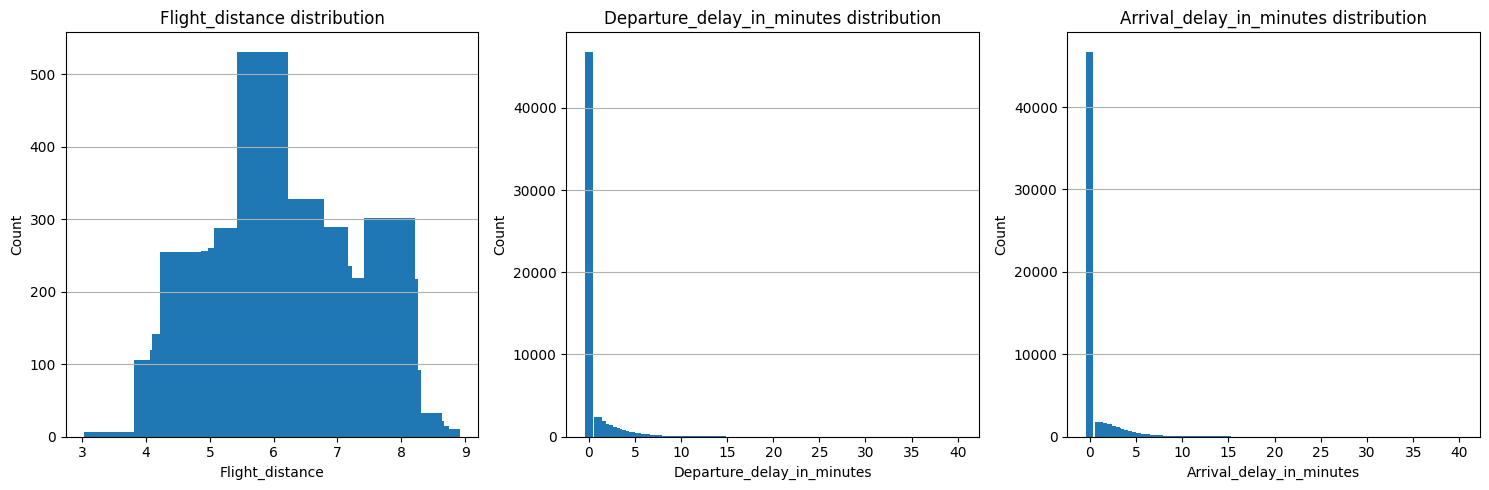

In [56]:
train_df_sgd['Departure_delay_in_minutes'] = np.sqrt(train_df_sgd['Departure_delay_in_minutes'])
val_df_sgd['Departure_delay_in_minutes'] = np.sqrt(val_df_sgd['Departure_delay_in_minutes'])

train_df_sgd['Arrival_delay_in_minutes'] = np.sqrt(train_df_sgd['Arrival_delay_in_minutes'])
val_df_sgd['Arrival_delay_in_minutes'] = np.sqrt(val_df_sgd['Arrival_delay_in_minutes'])

train_df_sgd['Flight_distance'] = np.log(train_df_sgd['Flight_distance'])
val_df_sgd['Flight_distance'] = np.log(val_df_sgd['Flight_distance'])

bar_plot_value_counts(train_df_sgd, ['Flight_distance', 'Departure_delay_in_minutes', 'Arrival_delay_in_minutes'], 3)

## 2.2. Model comparison

In [57]:
def model_comparison(model, train, y_train, val, y_val):
    start = time.time()
    model.fit(train, y_train)
    stop = time.time()
    y_pred = model.predict(val)
    
    f1 = f1_score(y_val, y_pred)
    training_time = stop-start
    return f1, training_time

In [58]:
sgd = SGDClassifier(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
gradient_boost = GradientBoostingClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
hist_gradient_boost = HistGradientBoostingClassifier(random_state=42)
LGBM = LGBMClassifier(random_state=42)

In [59]:
f1_sgd, tr_time_sgd = model_comparison(sgd, train_df_sgd, y_train, val_df_sgd, y_val)
f1_sgd, tr_time_sgd

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.


(0.8341342170671084, 8.963338375091553)

In [60]:
model_comparison_without_nones = []
for model in [decision_tree, gradient_boost, random_forest, hist_gradient_boost, LGBM]:
    name = str(model)
    f1, tr_time = model_comparison(model, train_df_copy, y_train, val_df_copy, y_val)
    model_comparison_without_nones.append((name, f1, tr_time))

In [61]:
model_comparison_without_nones.append(('SGDClassifier', f1_sgd, tr_time_sgd))

In [62]:
df_model_scores = pd.DataFrame(model_comparison_without_nones, columns = ['model_name', 'f1', 'time'])
df_model_scores.sort_values(by='time')

,model_name,f1,time
4,LGBMClassifier(random_state=42),0.957190,0.318270
0,DecisionTreeClassifier(random_state=42),0.939946,0.401910
3,HistGradientBoostingClassifier(random_state=42),0.956971,0.646520
2,RandomForestClassifier(random_state=42),0.955566,6.444568
5,SGDClassifier,0.834134,8.963338
1,GradientBoostingClassifier(random_state=42),0.932863,9.203536


In [63]:
df_model_scores.sort_values(by='f1', ascending = False)

,model_name,f1,time
4,LGBMClassifier(random_state=42),0.957190,0.318270
3,HistGradientBoostingClassifier(random_state=42),0.956971,0.646520
2,RandomForestClassifier(random_state=42),0.955566,6.444568
0,DecisionTreeClassifier(random_state=42),0.939946,0.401910
1,GradientBoostingClassifier(random_state=42),0.932863,9.203536
5,SGDClassifier,0.834134,8.963338


So the best two models are HistGradientBoostingClassifier and LGBMClassifier. 
But before choosing the model, I also want to compare how both models deal with datasets with NaNs.

In [64]:
model_comparison_with_nan = []
for model in [hist_gradient_boost, LGBM_default]:
    name = str(model)
    f1, tr_time = model_comparison(model, train_df, y_train, val_df, y_val)
    model_comparison_with_nan.append((name, f1, tr_time))

In [65]:
df_model_scores_nan = pd.DataFrame(model_comparison_with_nan, columns = ['model_name', 'f1', 'time'])
df_model_scores_nan.sort_values(by='time')

,model_name,f1,time
1,LGBMClassifier(random_state=42),0.957898,0.264955
0,HistGradientBoostingClassifier(random_state=42),0.956580,0.607942


I chose LGBMClassifier, as it is faster than other models and has the highest F1-score among all tested models.

# 3. Feature analysis and enhancement
## 3.1. Exploring feature importance and dependencies

As mentioned earlier,  I will use the SHAP library for exploring feature importance for the model because, in my experience, the functions provided by this library give me more helpful information on feature importance and dependencies compared to the plot_importance() function from the lightgbm library and the corr() function from pandas library.

Since I plan to use the SHAP library also for evaluating the importance of new features, I will develop two functions to ease this process: 
- shap_values_calculation(). This function will calculate the SHAP values for tree ensemble methods(LGBMCLassifier here). The SHAP values are necessary inputs for the SHAP library functions I plan to use.
-  mean_shap_values_calculation(). This function will return a DataFrame containing the mean of the SHAP values per feature.

In [66]:
def shap_values_calculation(model, train_set):
    explainer = shap.TreeExplainer(model) 
    shap_values = explainer.shap_values(train_set) 
    
    return shap_values

In [67]:
"""
    Calculate the mean SHAP values for each feature across different classes.

    Parameters:
    - data_set (DataFrame): The dataset for which SHAP values are calculated.
    - shap_values (list of arrays): List of SHAP values for each class.
    - columns (list, optional): List of column names. If not provided, all columns are used.

    Returns:
    - DataFrame: A DataFrame containing mean SHAP values for each feature, sorted by importance.
    """

def mean_shap_values_calculation(data_set, shap_values, columns=[]):
    if not columns:
        columns = data_set.columns.tolist()

    num_classes = len(shap_values)
    mean_lists = [[] for _ in range(num_classes)]

    for i in range(len(columns)):
        for cl in range(num_classes):
            mean = np.abs(shap_values[cl][:, i]).mean(axis=0)
            mean_lists[cl].append(mean)



    shap_mean = np.sum(np.column_stack(mean_lists), 1)
    
    df_shap_means = pd.DataFrame({'feature': columns, 'mean_shap_value': shap_mean},
                                 index=np.arange(0, len(columns))).sort_values(by='mean_shap_value', ascending=False).reset_index(drop=True)
    return df_shap_means

According to the SHAP documentation, the SHAP functions summary_plot() and dependence_plot() require a trained model and a complete dataset without the target column('Satisfaction' column here). Since I created a new 'Class_fr' column with frequency encoding values from the 'Class' column and deleted the last one - I will concatenate train_df and val_df into full_train to get a complete dataset.

In [68]:
LGBM_model = LGBM.fit(train_df, y_train)
full_train = pd.concat([train_df, val_df])
full_train

,Gender,Customer_type,Age,Type_of_travel,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,...,Inflight_entertainment,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Class_fr
0,1,0,59,0,1046,4,5,4,1,5,...,2,2,4,3,5,2,4,12,3.0,0.45
1,1,1,40,1,752,4,4,4,2,1,...,1,4,2,4,3,5,1,19,29.0,0.48
2,0,0,65,0,383,2,3,2,1,1,...,1,5,4,5,5,5,1,0,0.0,0.45
3,1,0,70,0,2239,3,5,3,4,3,...,5,5,3,5,3,5,5,0,0.0,0.45
4,1,1,25,1,1358,2,2,2,3,1,...,1,1,2,3,5,2,1,3,15.0,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20776,0,1,42,1,236,1,1,1,3,1,...,1,2,3,4,2,4,1,0,0.0,0.48
20777,0,0,14,0,558,2,4,2,2,5,...,5,4,4,5,5,4,5,0,0.0,0.45
20778,0,0,9,0,1005,2,5,2,3,5,...,5,4,4,2,3,5,5,1,0.0,0.45
20779,1,0,45,1,3234,3,3,3,3,5,...,4,4,4,4,3,4,3,0,19.0,0.48


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


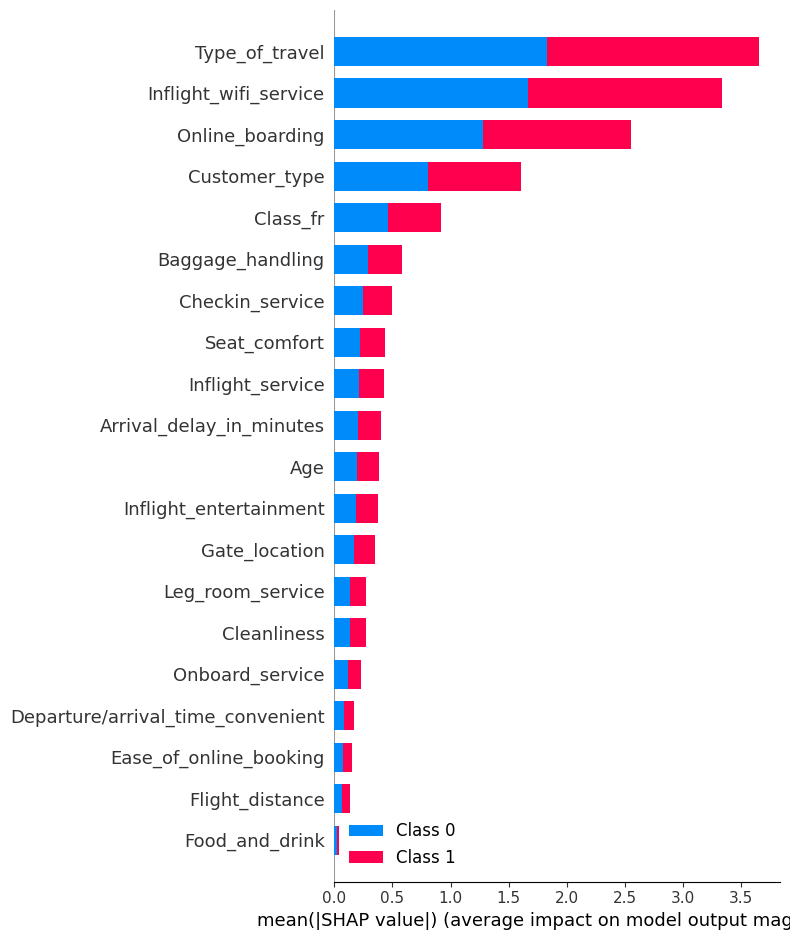

In [69]:
shap_values = shap_values_calculation(LGBM, full_train)
shap.summary_plot(shap_values, features=full_train, feature_names=list(full_train.columns))    

In [70]:
mean_shap_values_df = mean_shap_values_calculation(full_train, shap_values)
mean_shap_values_df

,feature,mean_shap_value
0,Type_of_travel,3.653035
1,Inflight_wifi_service,3.340171
2,Online_boarding,2.553097
3,Customer_type,1.604225
4,Class_fr,0.920592
5,Baggage_handling,0.581726
6,Checkin_service,0.500235
7,Seat_comfort,0.434313
8,Inflight_service,0.423311
9,Arrival_delay_in_minutes,0.398909


Plotting the effect of a single feature across the whole dataset.

A Reminder of how the following features were coded:
- Gender:
    - Male - 0;
    - Female - 1;
- Customer_type:
    - Loyal customer - 0;
    - Disloyal customer - 1;
- Type_of_travel:
    - Personal travel - 0;
    - Business travel - 1.

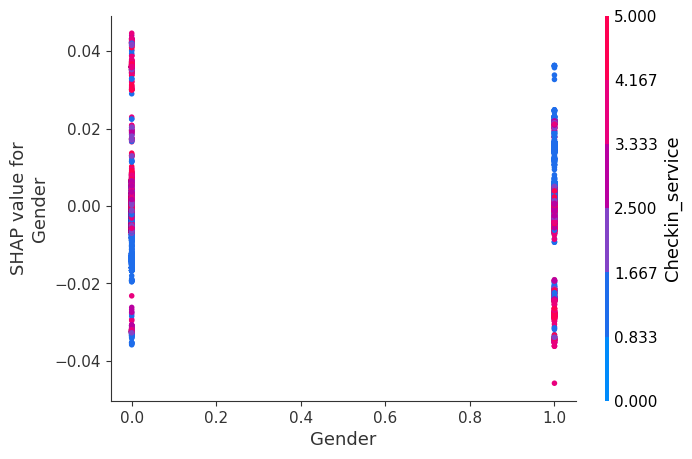

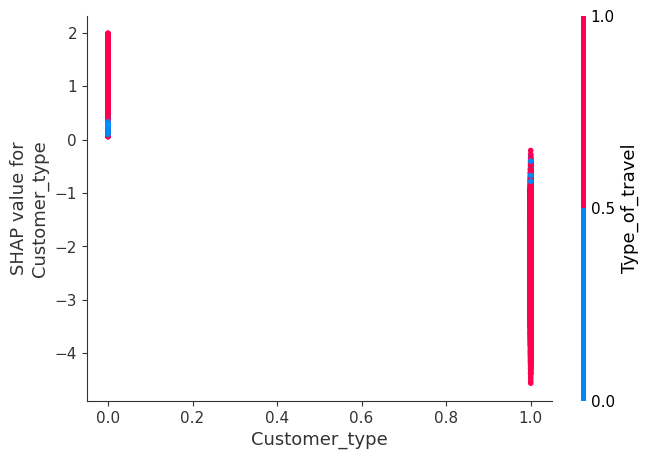

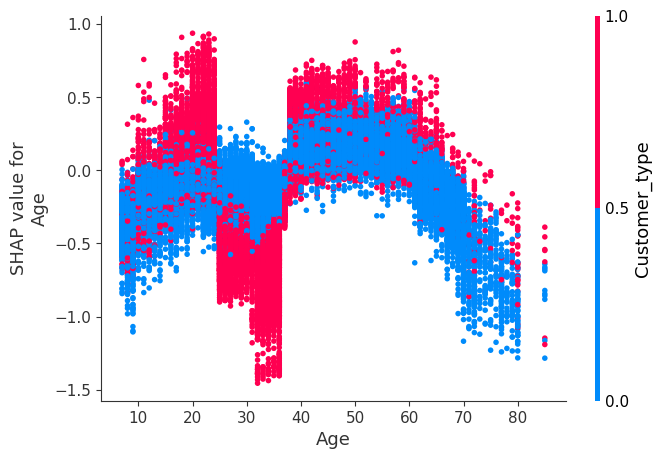

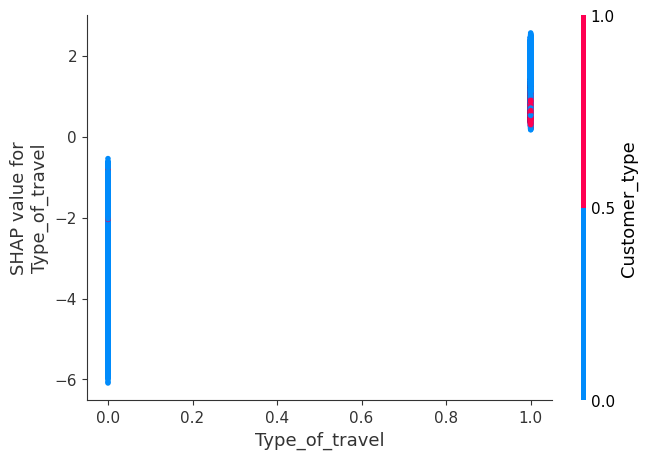

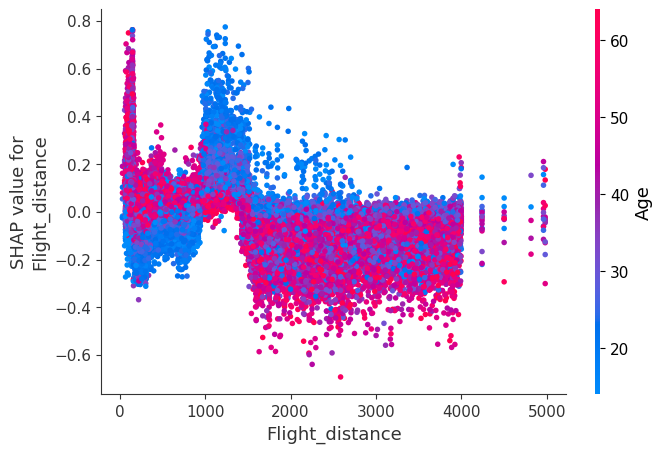

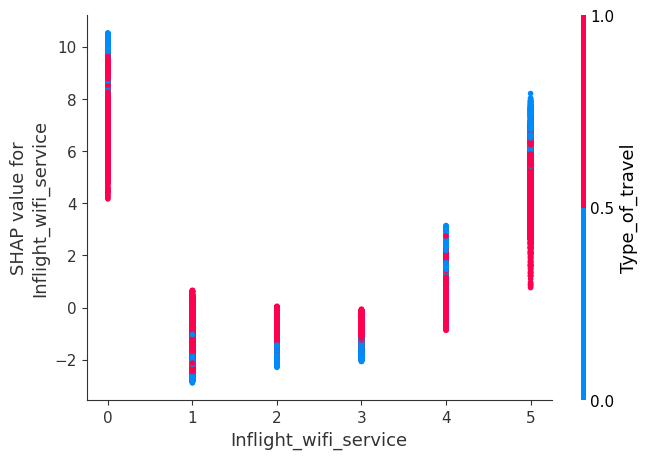

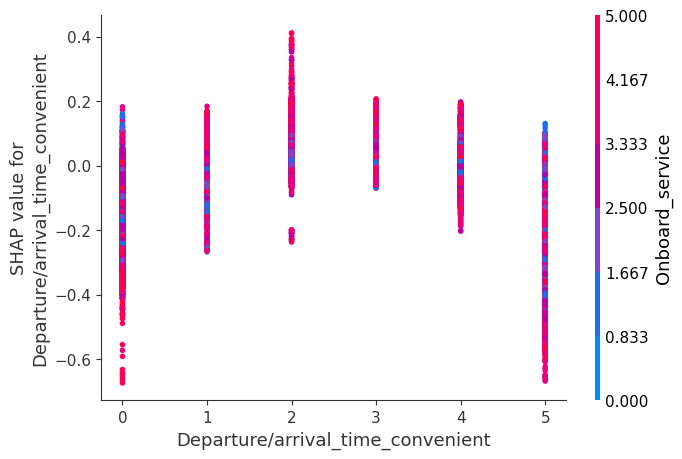

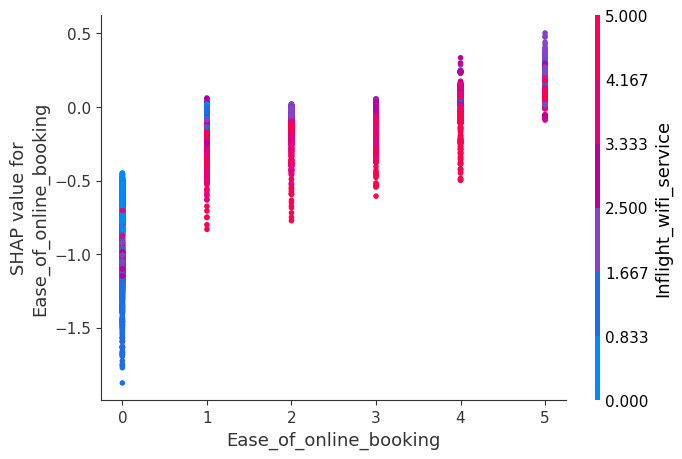

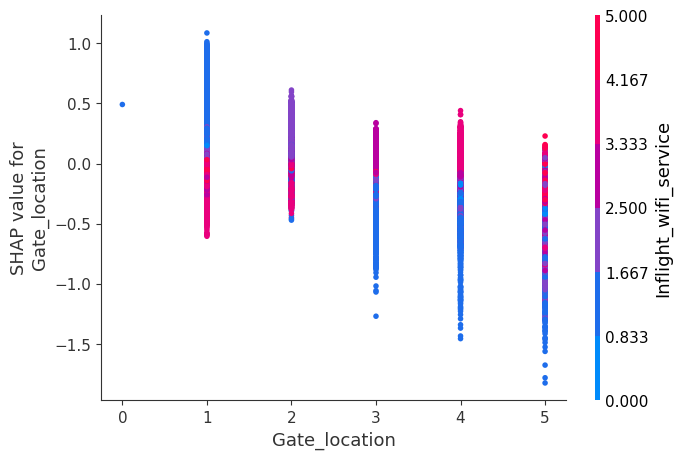

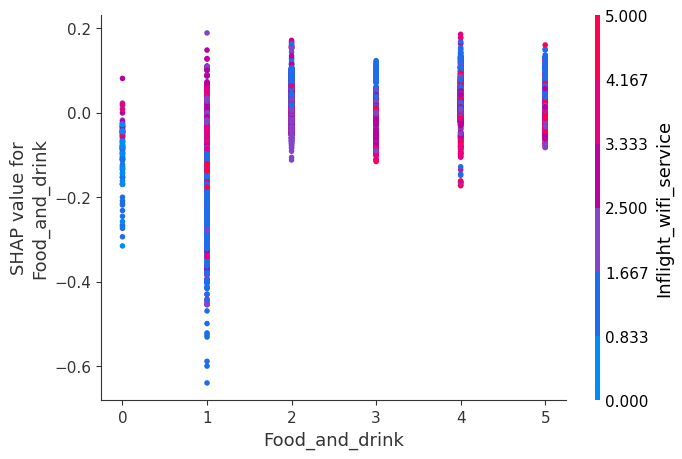

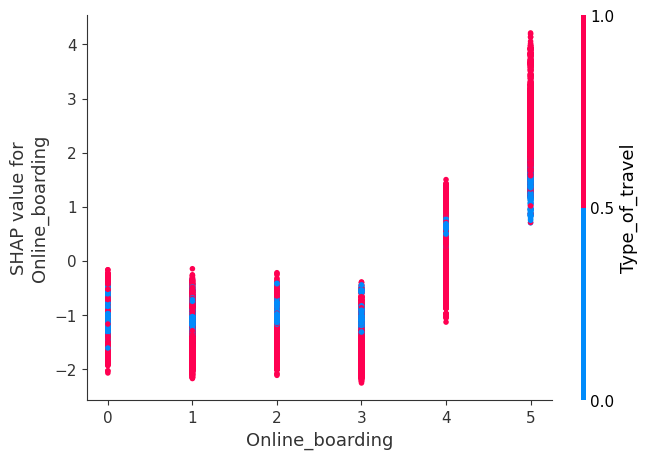

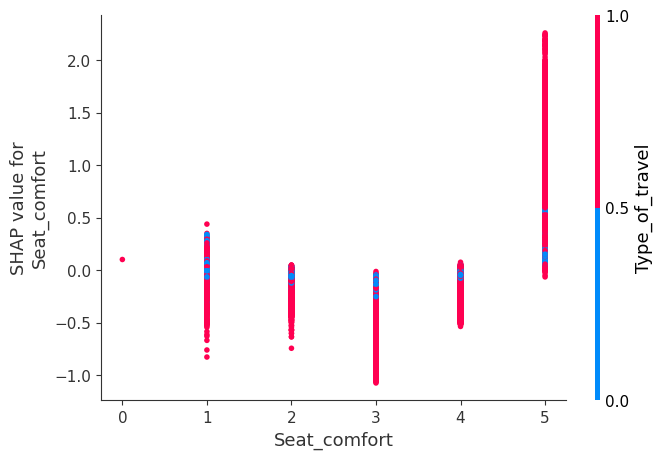

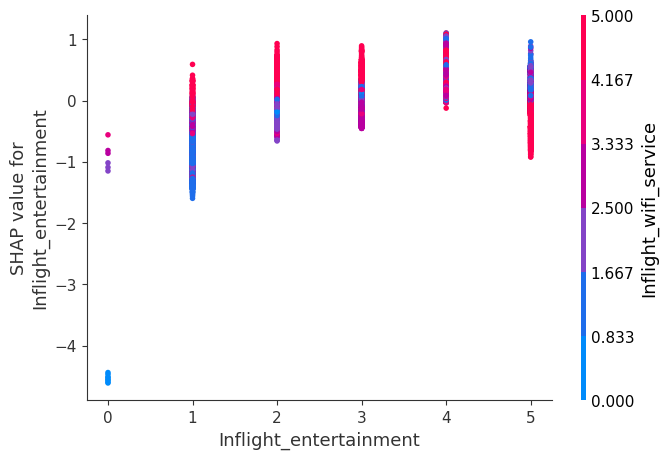

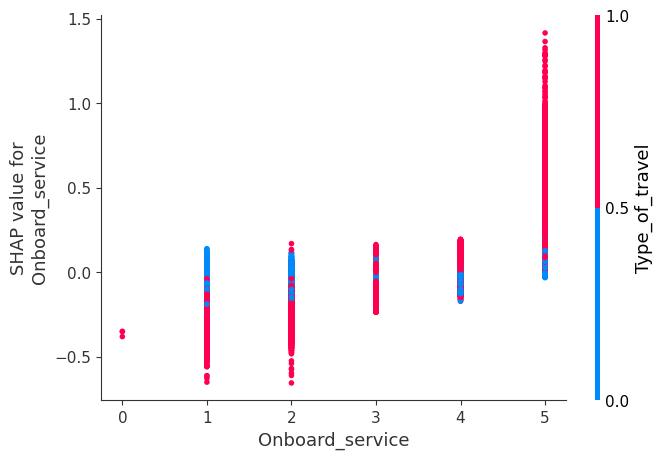

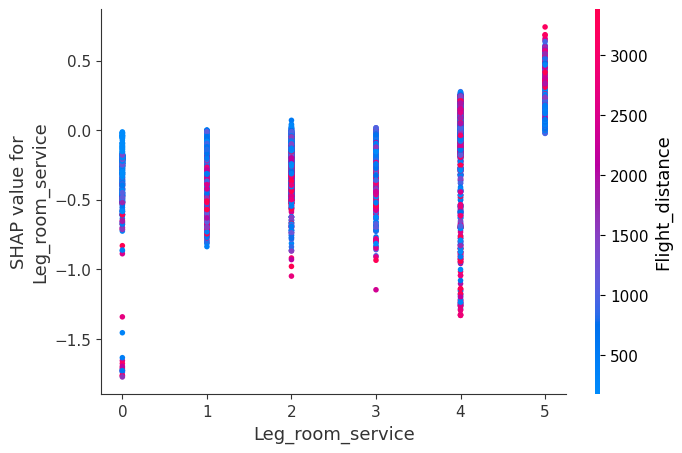

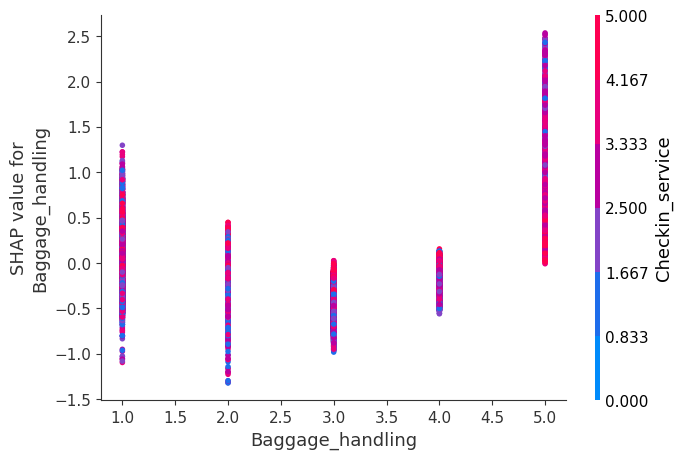

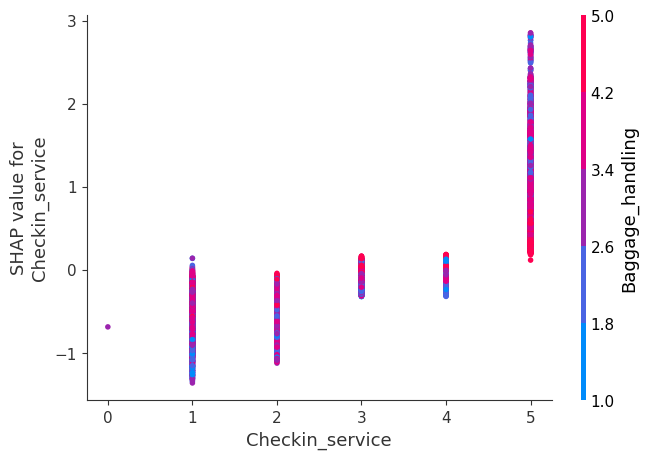

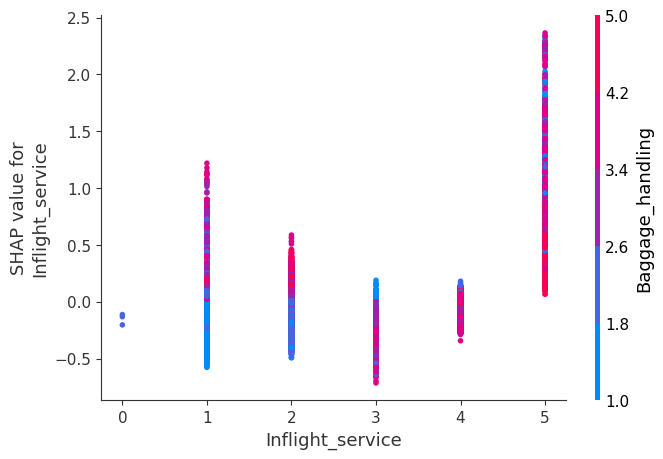

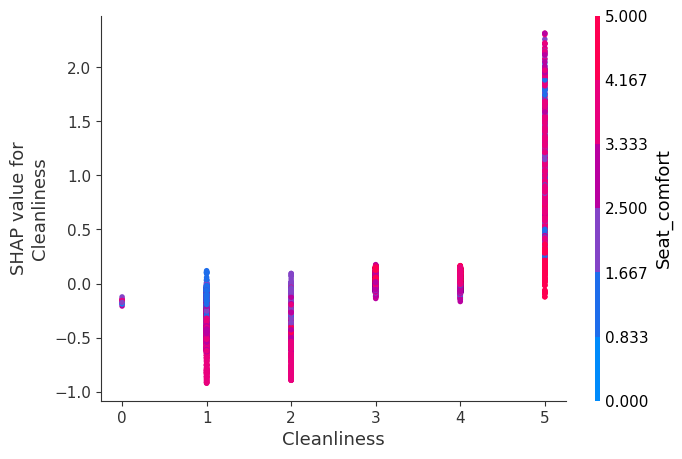

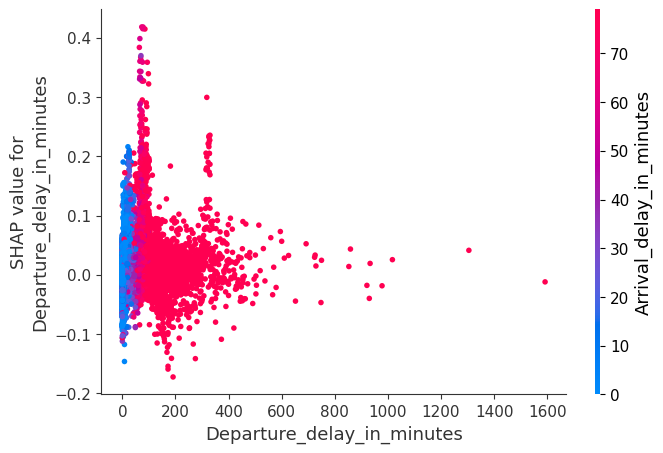

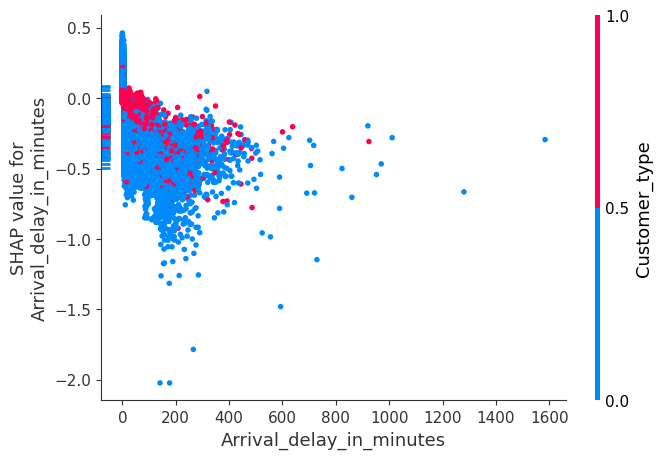

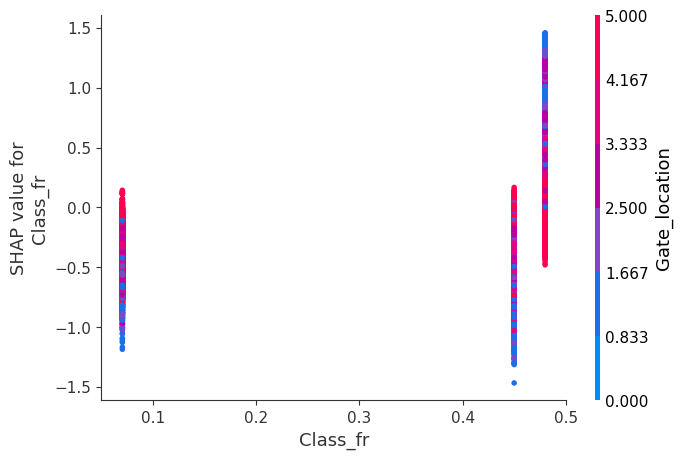

In [71]:
for name in train_df.columns:
    shap.dependence_plot(name, shap_values[1], full_train)

Based on the graphs above and feature importance analysis, I have decided to implement the next steps with the following features.

**1. Gender.**
This feature has minimal importance for the model, and there are no strong dependencies with other features. I suppose it can be deleted without any effect on model performance.

**2. Age.**
As mentioned previously in section 1.3. Analyzing the 'Age' column, the small representativeness of passengers of age 71 and above can cause model overfitting or lead to inaccurate predictions for this category of passengers. Based on the summary_plot() results - the Age feature is pretty important, and its exclusion can decrease model performance. I suppose the best way to resolve the problem of small representativeness of passengers 71 and above is to group Age data into groups, for example, young, adults, and seniors.
The dependence_plot also reveals a correlation between the Age and Customer_type features. At first sight, there are fewer disloyal customers among passengers under 20 years and over 60. However, these age categories are less representative compared to the age category 20-60 years. That's why I don't think combining these two features into the new one could 
replace the Age feature in the feature importance graph. Possibly, this correlation graph can help with creating Age_groups.

**3. Type_of_travel.**
It seems to me that the most disloyal customers had business travels. I think the Customer_type and the Type_of_travel features impact each other, so I will try to combine them into the new one.
Also, as the most important feature, the Type_of_travel correlated most often with other rating-type features. I think it is an interesting observation, but I won't create new features based on the Type_of_travel and rating-type features cause I guess it will add more noise than increase model performance.

**4.New features.**
There are relationships between several rating features, showing sometimes the same low or high ratings for both. For example, dependence plot for 'Inflight_service' and 'Baggage_handling' features. Based on this observation, I assume passengers who rate most services low are likely to be unsatisfied with the airline services. Conversely,  passengers who rate the most services highly are more likely to be satisfied. 
To test this assumption, I would like to create six new features,  each of which will aggregate for every row the total count of each type of rating given by the passenger about airline services. For example, there could be for one of the passengers the total number of rates 0 - 5, rates 1 - 5, rates 3 - 1, rates 4 - 2, and rates 5 - 1. 

### 3.1.1. Deleting the Gender column

In [72]:
LGBM_default.fit(train_df, y_train,
                 eval_set=[(val_df, y_val), (train_df, y_train)],
                 eval_names =['train_loss', 'val_loss'],
                 eval_metric='binary',
                callbacks=callbacks)
y_pred_default = LGBM_default.predict(val_df)

f1 = f1_score(y_val, y_pred_default)
f1

0.9578982822499158

In [73]:
train_df.drop('Gender', axis = 1, inplace = True)
val_df.drop('Gender', axis = 1, inplace = True)

In [74]:
LGBM_default.fit(train_df, y_train,
                 eval_set=[(val_df, y_val), (train_df, y_train)],
                 eval_names =['train_loss', 'val_loss'],
                 eval_metric='binary',
                callbacks=callbacks)
y_pred_default = LGBM_default.predict(val_df)

f1 = f1_score(y_val, y_pred_default)
f1

0.9568050328596305

The difference in the f1-score with and without the 'Gender' column is ~0.001. I guess, in this case, it isn't a significant difference.

### 3.1.2. Creating Age_groups instead of the 'Age' column
To start, I want to plot a more detailed dependence plot for the Age column to study the spread of Customer_type for every age in the dataset.

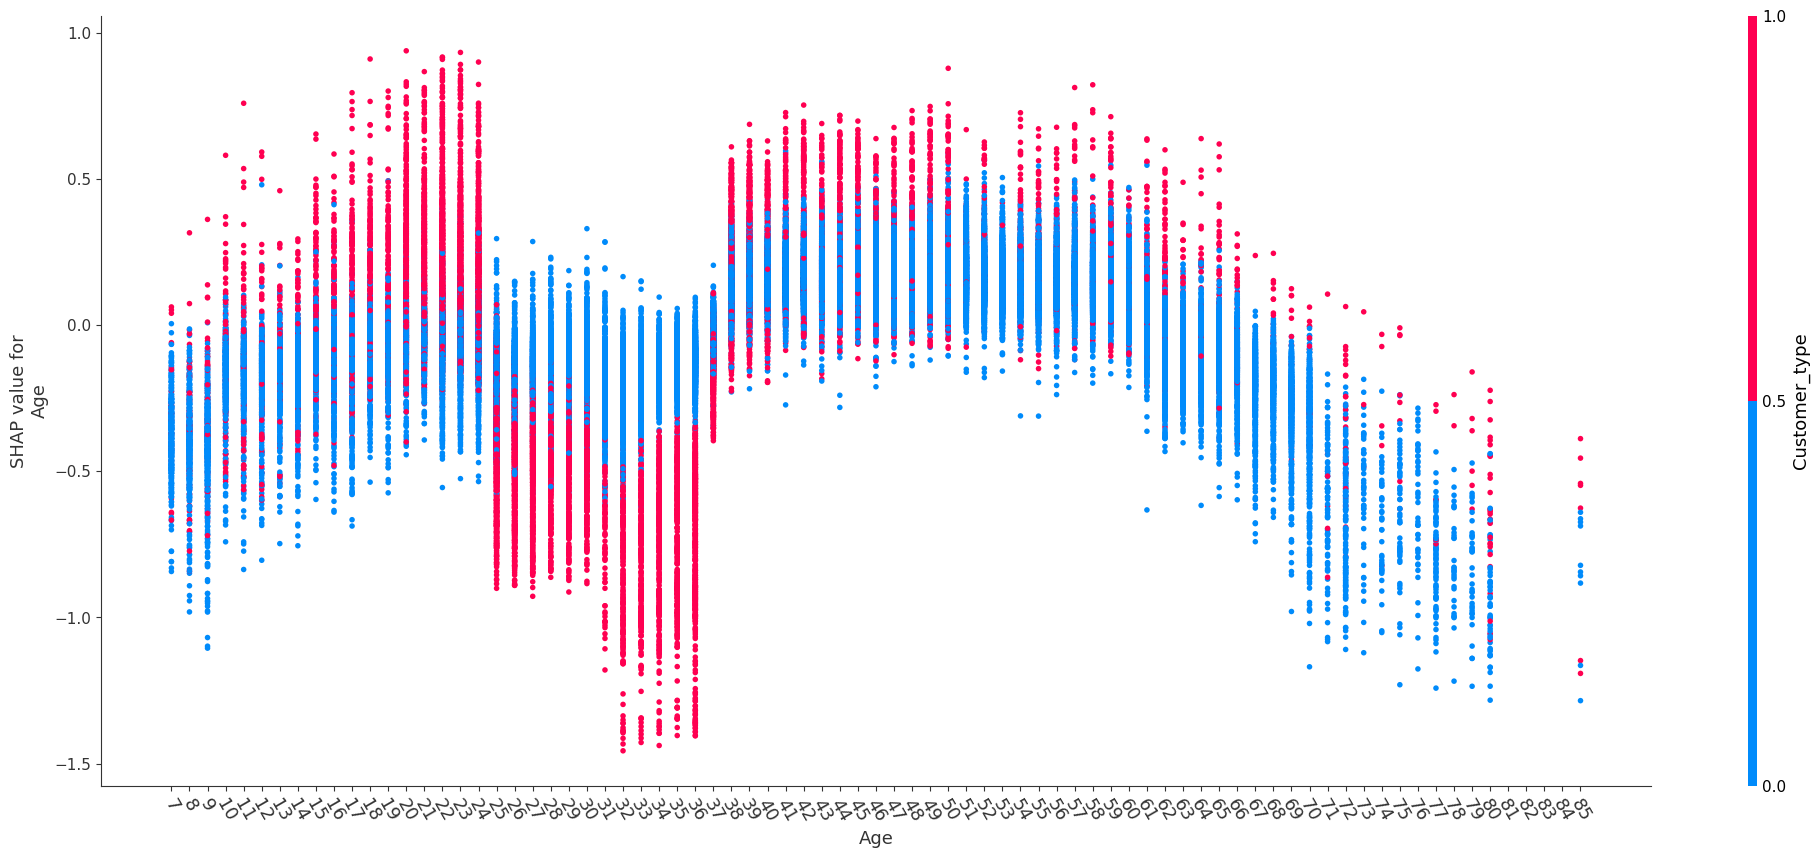

In [75]:
shap.dependence_plot('Age', shap_values[1], full_train, show=False)
ax = plt.gca()

# using this range as the minimum age in the 'Age' column is 7, and the maximum is 85
ax.set_xticks(range(7, 86))
ax.set_xticklabels(ax.get_xmajorticklabels(),
                   rotation = 300,
                   fontsize = 13)

plt.gcf().set_size_inches(25, 10) 
plt.show()

Based on the distribution of loyal and disloyal customers per age on the graph above, I plan to use the next age ranges for grouping and creating new feature: 7-14, 15-24, 25-36, 37-50, and 50+.

I suppose the best way to find the most relevant age ranges for creating age grouping is to check different variants. That's why, in addition to the abovementioned age ranges, I will generate three more variants of age ranges (i.e., three more features).

As I want the feature with Age_groups to replace the Age feature and have the same or almost the same feature importance as the original one, I will check every new one separately from each other and exclude the Age feature from the list of features for training and checking feature importance.

In [76]:
columns_without_age = ['Customer_type', 'Type_of_travel', 'Flight_distance',
       'Inflight_wifi_service', 'Departure/arrival_time_convenient',
       'Ease_of_online_booking', 'Gate_location', 'Food_and_drink',
       'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Inflight_service', 'Cleanliness',
       'Departure_delay_in_minutes', 'Arrival_delay_in_minutes', 'Class_fr']

In [77]:
def age_group(data_set, age_bins, age_labels):
    result = pd.cut(data_set['Age'], bins=age_bins, labels=age_labels)
    return result.cat.codes.astype(int)

In [78]:
age_bins_exp = [0, 14, 24, 36, 50, float('inf')]
age_labels_exp = [1, 2, 3, 4, 5]

for data_set in [full_train, train_df]:
    data_set['AgeGroup_exp'] = age_group(data_set, age_bins_exp, age_labels_exp)
full_train.head()

,Gender,Customer_type,Age,Type_of_travel,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,...,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Class_fr,AgeGroup_exp
0,1,0,59,0,1046,4,5,4,1,5,...,2,4,3,5,2,4,12,3.0,0.45,4
1,1,1,40,1,752,4,4,4,2,1,...,4,2,4,3,5,1,19,29.0,0.48,3
2,0,0,65,0,383,2,3,2,1,1,...,5,4,5,5,5,1,0,0.0,0.45,4
3,1,0,70,0,2239,3,5,3,4,3,...,5,3,5,3,5,5,0,0.0,0.45,4
4,1,1,25,1,1358,2,2,2,3,1,...,1,2,3,5,2,1,3,15.0,0.45,2


In [79]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 20780
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer_type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type_of_travel                     103904 non-null  int64  
 4   Flight_distance                    103904 non-null  int64  
 5   Inflight_wifi_service              103904 non-null  int64  
 6   Departure/arrival_time_convenient  103904 non-null  int64  
 7   Ease_of_online_booking             103904 non-null  int64  
 8   Gate_location                      103904 non-null  int64  
 9   Food_and_drink                     103904 non-null  int64  
 10  Online_boarding                    103904 non-null  int64  
 11  Seat_comfort                       103904 non

In [80]:
age_bins_sm = [0, 18, 69, float('inf')]
age_labels_sm = [1, 2, 3]

for data_set in [full_train, train_df]:
    data_set['AgeGroup_small'] = age_group(data_set, age_bins_sm, age_labels_sm)
full_train.head()

,Gender,Customer_type,Age,Type_of_travel,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,...,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Class_fr,AgeGroup_exp,AgeGroup_small
0,1,0,59,0,1046,4,5,4,1,5,...,4,3,5,2,4,12,3.0,0.45,4,1
1,1,1,40,1,752,4,4,4,2,1,...,2,4,3,5,1,19,29.0,0.48,3,1
2,0,0,65,0,383,2,3,2,1,1,...,4,5,5,5,1,0,0.0,0.45,4,1
3,1,0,70,0,2239,3,5,3,4,3,...,3,5,3,5,5,0,0.0,0.45,4,2
4,1,1,25,1,1358,2,2,2,3,1,...,2,3,5,2,1,3,15.0,0.45,2,1


In [81]:
age_bins_m = [0, 13, 18, 30, 40, 50, 60, 69, float('inf')]
age_labels_m = [1, 2, 3, 4, 5, 6, 7, 8]

for data_set in [full_train, train_df]:
    data_set['AgeGroup_medium'] = age_group(data_set, age_bins_m, age_labels_m)
full_train.head()

,Gender,Customer_type,Age,Type_of_travel,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,...,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Class_fr,AgeGroup_exp,AgeGroup_small,AgeGroup_medium
0,1,0,59,0,1046,4,5,4,1,5,...,3,5,2,4,12,3.0,0.45,4,1,5
1,1,1,40,1,752,4,4,4,2,1,...,4,3,5,1,19,29.0,0.48,3,1,3
2,0,0,65,0,383,2,3,2,1,1,...,5,5,5,1,0,0.0,0.45,4,1,6
3,1,0,70,0,2239,3,5,3,4,3,...,5,3,5,5,0,0.0,0.45,4,2,7
4,1,1,25,1,1358,2,2,2,3,1,...,3,5,2,1,3,15.0,0.45,2,1,2


In [82]:
age_bins_big = [0, 14, 19, 21, 27, 35, 40, 50, 60, 69, float('inf')]
age_labels_big = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for data_set in [full_train, train_df]:
    data_set['AgeGroup_big'] = age_group(data_set, age_bins_big, age_labels_big)
full_train.head()

,Gender,Customer_type,Age,Type_of_travel,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,...,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Class_fr,AgeGroup_exp,AgeGroup_small,AgeGroup_medium,AgeGroup_big
0,1,0,59,0,1046,4,5,4,1,5,...,5,2,4,12,3.0,0.45,4,1,5,7
1,1,1,40,1,752,4,4,4,2,1,...,3,5,1,19,29.0,0.48,3,1,3,5
2,0,0,65,0,383,2,3,2,1,1,...,5,5,1,0,0.0,0.45,4,1,6,8
3,1,0,70,0,2239,3,5,3,4,3,...,3,5,5,0,0.0,0.45,4,2,7,9
4,1,1,25,1,1358,2,2,2,3,1,...,5,2,1,3,15.0,0.45,2,1,2,3


In [83]:
train_df.head()

,Customer_type,Age,Type_of_travel,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,Online_boarding,...,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Class_fr,AgeGroup_exp,AgeGroup_small,AgeGroup_medium,AgeGroup_big
0,0,59,0,1046,4,5,4,1,5,4,...,5,2,4,12,3.0,0.45,4,1,5,7
1,1,40,1,752,4,4,4,2,1,4,...,3,5,1,19,29.0,0.48,3,1,3,5
2,0,65,0,383,2,3,2,1,1,2,...,5,5,1,0,0.0,0.45,4,1,6,8
3,0,70,0,2239,3,5,3,4,3,5,...,3,5,5,0,0.0,0.45,4,2,7,9
4,1,25,1,1358,2,2,2,3,1,2,...,5,2,1,3,15.0,0.45,2,1,2,3


In [84]:
age_groups_list = ['AgeGroup_exp', 'AgeGroup_small', 'AgeGroup_medium', 'AgeGroup_big']

In [85]:
def compare_feature_importance(features_list, columns_default_list, full_train_set, train_set):
    for feature in features_list:
        features = columns_default_list.copy()
        features.append(feature)

        model = LGBM.fit(train_df[features], y_train)
        shap_values = shap_values_calculation(model, full_train[features])
        age_gr_importance_df = mean_shap_values_calculation(full_train[features], shap_values)

        print(feature)
        display(age_gr_importance_df)

In [86]:
compare_feature_importance(age_groups_list, columns_without_age, full_train, train_df)

AgeGroup_exp


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


,feature,mean_shap_value
0,Type_of_travel,3.738239
1,Inflight_wifi_service,3.346254
2,Online_boarding,2.666181
3,Customer_type,1.550620
4,Class_fr,0.992248
5,Baggage_handling,0.565689
6,Checkin_service,0.492689
7,Seat_comfort,0.439299
8,Inflight_entertainment,0.405368
9,Arrival_delay_in_minutes,0.399445


AgeGroup_small


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


,feature,mean_shap_value
0,Type_of_travel,4.232034
1,Inflight_wifi_service,3.457921
2,Online_boarding,2.624640
3,Customer_type,1.645339
4,Class_fr,0.805059
5,Baggage_handling,0.606797
6,Gate_location,0.510887
7,Checkin_service,0.509402
8,Seat_comfort,0.447149
9,Arrival_delay_in_minutes,0.418240


AgeGroup_medium


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


,feature,mean_shap_value
0,Type_of_travel,3.709711
1,Inflight_wifi_service,3.342064
2,Online_boarding,2.556878
3,Customer_type,1.585299
4,Class_fr,0.836976
5,Baggage_handling,0.575798
6,Checkin_service,0.494191
7,Seat_comfort,0.453971
8,Gate_location,0.419362
9,Inflight_service,0.404190


AgeGroup_big


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


,feature,mean_shap_value
0,Type_of_travel,3.687049
1,Inflight_wifi_service,3.240446
2,Online_boarding,2.624963
3,Customer_type,1.545933
4,Class_fr,0.891886
5,Baggage_handling,0.566556
6,Checkin_service,0.465344
7,Gate_location,0.425231
8,Seat_comfort,0.399925
9,Inflight_service,0.394485


From the results above, the AgeGroup_big feature has almost the same feature importance as the Age feature, so I suppose it is the best feature among all tested above to replace the Age feature.
Before replacement, I want to analyze the distribution of each created age group within the 'AgeGroup_big' column and calculate the percentage of each one in the dataset.

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


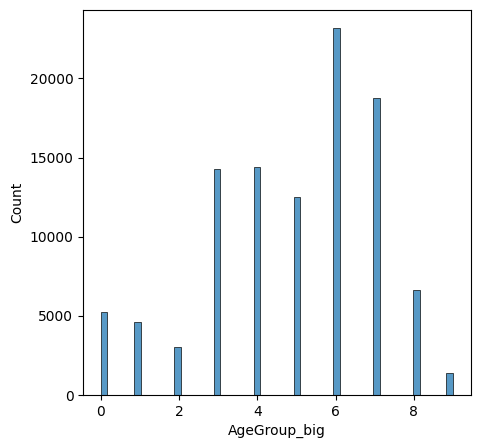

In [87]:
plt.figure(figsize = (5, 5))
res = sns.histplot(full_train['AgeGroup_big'])
plt.show()

In [88]:
age_gr_percentages_df = count_value_percentages(full_train, 'AgeGroup_big')
print(age_gr_percentages_df.name)
age_gr_percentages_df.sort_values(by=('Percentages'))

AgeGroup_big


,Values,Number of values,Percentages
9,9,1373,1.321412
8,2,3027,2.913266
7,1,4583,4.410802
6,0,5230,5.033492
5,8,6603,6.354905
4,5,12499,12.029373
3,3,14248,13.712658
2,4,14373,13.832961
1,7,18769,18.063790
0,6,23199,22.327341


The representation of senior passengers is still lower compared to that of other passengers, but it has improved to 1%, which is better than before. 
Next, I will rename the AgeGroup_big into 'Age_groups' and exclude other experimental age-group features from full_train and train_df datasets.
Also, I need to create the Age_groups feature for val_df and delete the 'Age' column from it.

In [89]:
full_train = full_train.rename(columns={'AgeGroup_big': 'Age_groups'})
train_df = train_df.rename(columns={'AgeGroup_big': 'Age_groups'})
train_df.head()

,Customer_type,Age,Type_of_travel,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,Online_boarding,...,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Class_fr,AgeGroup_exp,AgeGroup_small,AgeGroup_medium,Age_groups
0,0,59,0,1046,4,5,4,1,5,4,...,5,2,4,12,3.0,0.45,4,1,5,7
1,1,40,1,752,4,4,4,2,1,4,...,3,5,1,19,29.0,0.48,3,1,3,5
2,0,65,0,383,2,3,2,1,1,2,...,5,5,1,0,0.0,0.45,4,1,6,8
3,0,70,0,2239,3,5,3,4,3,5,...,3,5,5,0,0.0,0.45,4,2,7,9
4,1,25,1,1358,2,2,2,3,1,2,...,5,2,1,3,15.0,0.45,2,1,2,3


In [90]:
val_df['Age_groups'] = age_group(val_df, age_bins_big, age_labels_big)
val_df.drop('Age', axis = 1, inplace = True)
val_df.head()

,Customer_type,Type_of_travel,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,...,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Class_fr,Age_groups
0,0,0,861,2,4,2,5,5,2,5,...,5,4,4,3,5,5,0,0.0,0.45,3
1,0,1,393,3,5,5,5,3,3,3,...,1,1,3,2,3,3,0,16.0,0.48,3
2,0,0,196,1,3,1,3,2,3,3,...,4,1,4,3,4,4,37,34.0,0.45,7
3,0,0,1020,2,3,2,4,4,2,4,...,3,2,4,1,4,4,27,4.0,0.45,4
4,1,1,1117,2,2,2,1,2,2,5,...,2,2,3,2,2,2,0,0.0,0.48,4


In [91]:
columns_to_drop = ['Age', 'AgeGroup_exp', 'AgeGroup_small', 'AgeGroup_medium']
full_train.drop(columns_to_drop, axis = 1, inplace = True)
train_df.drop(columns_to_drop, axis = 1, inplace = True)

Checking model performance with default parameters and Age_groups feature instead of Age feature.

In [92]:
LGBM_default.fit(train_df, y_train,
                 eval_set=[(val_df, y_val), (train_df, y_train)],
                 eval_names =['train_loss', 'val_loss'],
                 eval_metric='binary',
                callbacks=callbacks)
y_pred_default = LGBM_default.predict(val_df)

f1 = f1_score(y_val, y_pred_default)
f1

0.9572150477259967

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

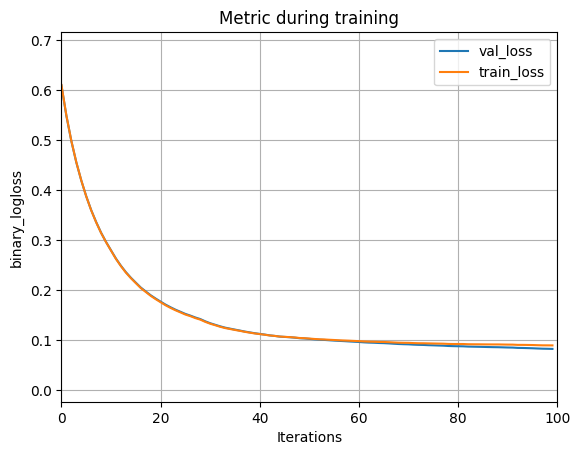

In [93]:
lgb.plot_metric(LGBM_default, metric='binary_logloss')

F1-score is almost the same as in default model before feature encoding. 

In [94]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83123 entries, 0 to 83122
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer_type                      83123 non-null  int64  
 1   Type_of_travel                     83123 non-null  int64  
 2   Flight_distance                    83123 non-null  int64  
 3   Inflight_wifi_service              83123 non-null  int64  
 4   Departure/arrival_time_convenient  83123 non-null  int64  
 5   Ease_of_online_booking             83123 non-null  int64  
 6   Gate_location                      83123 non-null  int64  
 7   Food_and_drink                     83123 non-null  int64  
 8   Online_boarding                    83123 non-null  int64  
 9   Seat_comfort                       83123 non-null  int64  
 10  Inflight_entertainment             83123 non-null  int64  
 11  Onboard_service                    83123 non-null  int

## 3.2. New features
### 3.2.1. Combine 'Customer_type' and 'Type_of_travel' in the new feature
As I have done with Age_groups, I check different ways to create a new feature from combination values from the 'Customer_type' and 'Type_of_travel' columns and check all variants separately. I wouldn't exclude Customer_type or Type_of_travel features from checking feature importance, as they both have high mean shap values.

In [95]:
full_train['Sum_Customer_Travel'] = full_train['Customer_type'] + full_train['Type_of_travel']
train_df['Sum_Customer_Travel'] = train_df['Customer_type'] + train_df['Type_of_travel']
full_train.head()

,Gender,Customer_type,Type_of_travel,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,Online_boarding,...,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Class_fr,Age_groups,Sum_Customer_Travel
0,1,0,0,1046,4,5,4,1,5,4,...,4,3,5,2,4,12,3.0,0.45,7,0
1,1,1,1,752,4,4,4,2,1,4,...,2,4,3,5,1,19,29.0,0.48,5,2
2,0,0,0,383,2,3,2,1,1,2,...,4,5,5,5,1,0,0.0,0.45,8,0
3,1,0,0,2239,3,5,3,4,3,5,...,3,5,3,5,5,0,0.0,0.45,9,0
4,1,1,1,1358,2,2,2,3,1,2,...,2,3,5,2,1,3,15.0,0.45,3,2


In [96]:
full_train['Mult_Customer_Travel'] = full_train['Customer_type'] * full_train['Type_of_travel']
train_df['Mult_Customer_Travel'] = train_df['Customer_type'] * train_df['Type_of_travel']
full_train.head()

,Gender,Customer_type,Type_of_travel,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,Online_boarding,...,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Class_fr,Age_groups,Sum_Customer_Travel,Mult_Customer_Travel
0,1,0,0,1046,4,5,4,1,5,4,...,3,5,2,4,12,3.0,0.45,7,0,0
1,1,1,1,752,4,4,4,2,1,4,...,4,3,5,1,19,29.0,0.48,5,2,1
2,0,0,0,383,2,3,2,1,1,2,...,5,5,5,1,0,0.0,0.45,8,0,0
3,1,0,0,2239,3,5,3,4,3,5,...,5,3,5,5,0,0.0,0.45,9,0,0
4,1,1,1,1358,2,2,2,3,1,2,...,3,5,2,1,3,15.0,0.45,3,2,1


In [97]:
full_train['XOR_Customer_Travel'] = full_train['Customer_type'] ^ full_train['Type_of_travel']
train_df['XOR_Customer_Travel'] = train_df['Customer_type'] ^ train_df['Type_of_travel']
full_train.head()

,Gender,Customer_type,Type_of_travel,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,Online_boarding,...,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Class_fr,Age_groups,Sum_Customer_Travel,Mult_Customer_Travel,XOR_Customer_Travel
0,1,0,0,1046,4,5,4,1,5,4,...,5,2,4,12,3.0,0.45,7,0,0,0
1,1,1,1,752,4,4,4,2,1,4,...,3,5,1,19,29.0,0.48,5,2,1,0
2,0,0,0,383,2,3,2,1,1,2,...,5,5,1,0,0.0,0.45,8,0,0,0
3,1,0,0,2239,3,5,3,4,3,5,...,3,5,5,0,0.0,0.45,9,0,0,0
4,1,1,1,1358,2,2,2,3,1,2,...,5,2,1,3,15.0,0.45,3,2,1,0


In [98]:
columns_default = ['Customer_type', 'Age_groups', 'Type_of_travel', 'Flight_distance',
       'Inflight_wifi_service', 'Departure/arrival_time_convenient',
       'Ease_of_online_booking', 'Gate_location', 'Food_and_drink',
       'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Inflight_service', 'Cleanliness',
       'Departure_delay_in_minutes', 'Arrival_delay_in_minutes', 'Class_fr']

In [99]:
new_features_list = ['Sum_Customer_Travel', 'Mult_Customer_Travel', 'XOR_Customer_Travel']

In [100]:
compare_feature_importance(new_features_list, columns_default, full_train, train_df)

Sum_Customer_Travel


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


,feature,mean_shap_value
0,Inflight_wifi_service,3.337175
1,Online_boarding,2.576699
2,Type_of_travel,2.218271
3,Sum_Customer_Travel,1.530093
4,Customer_type,1.247567
5,Class_fr,0.864208
6,Baggage_handling,0.560359
7,Gate_location,0.480298
8,Checkin_service,0.458836
9,Seat_comfort,0.418828


Mult_Customer_Travel


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


,feature,mean_shap_value
0,Type_of_travel,3.640619
1,Inflight_wifi_service,3.300076
2,Online_boarding,2.590773
3,Customer_type,1.340576
4,Class_fr,0.951150
5,Baggage_handling,0.586997
6,Checkin_service,0.472511
7,Gate_location,0.466809
8,Seat_comfort,0.437876
9,Inflight_service,0.377623


XOR_Customer_Travel


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


,feature,mean_shap_value
0,XOR_Customer_Travel,3.611670
1,Inflight_wifi_service,3.362847
2,Online_boarding,2.351088
3,Type_of_travel,1.378074
4,Class_fr,0.918415
5,Baggage_handling,0.581659
6,Checkin_service,0.481351
7,Arrival_delay_in_minutes,0.430474
8,Seat_comfort,0.430139
9,Inflight_service,0.424297


XOR_Customer_Travel feature seems the best combination of Customer_type and Type_of_travel features.

In [101]:
val_df['XOR_Customer_Travel'] = val_df['Customer_type'] ^ val_df['Type_of_travel']
val_df.head()

,Customer_type,Type_of_travel,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,...,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Class_fr,Age_groups,XOR_Customer_Travel
0,0,0,861,2,4,2,5,5,2,5,...,4,4,3,5,5,0,0.0,0.45,3,0
1,0,1,393,3,5,5,5,3,3,3,...,1,3,2,3,3,0,16.0,0.48,3,1
2,0,0,196,1,3,1,3,2,3,3,...,1,4,3,4,4,37,34.0,0.45,7,0
3,0,0,1020,2,3,2,4,4,2,4,...,2,4,1,4,4,27,4.0,0.45,4,0
4,1,1,1117,2,2,2,1,2,2,5,...,2,3,2,2,2,0,0.0,0.48,4,0


In [102]:
columns_to_drop = ['Sum_Customer_Travel', 'Mult_Customer_Travel']
full_train.drop(columns_to_drop, axis=1, inplace=True)
train_df.drop(columns_to_drop, axis=1, inplace=True)
train_df.head()

,Customer_type,Type_of_travel,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,...,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Class_fr,Age_groups,XOR_Customer_Travel
0,0,0,1046,4,5,4,1,5,4,5,...,4,3,5,2,4,12,3.0,0.45,7,0
1,1,1,752,4,4,4,2,1,4,5,...,2,4,3,5,1,19,29.0,0.48,5,0
2,0,0,383,2,3,2,1,1,2,1,...,4,5,5,5,1,0,0.0,0.45,8,0
3,0,0,2239,3,5,3,4,3,5,4,...,3,5,3,5,5,0,0.0,0.45,9,0
4,1,1,1358,2,2,2,3,1,2,1,...,2,3,5,2,1,3,15.0,0.45,3,0


### 3.2.2. Count the number of each type of rating per passenger
As mentioned above in section 3.1. Exploring feature importance and dependencies, I suppose passengers who rate most services low are likely to be unsatisfied with the airline services and vice versa.
To test this assumption I create six new features: **'Total_0', 'Total_1', 'Total_2', 'Total_3', 'Total_4', and 'Total_5'**. These features aggregate, for each passenger, the total count of each type of rating given for various airline services.
As previously, I will check how much every feature is important separately.

In [103]:
rate_columns= ['Inflight_wifi_service', 'Departure/arrival_time_convenient',
       'Ease_of_online_booking', 'Gate_location', 'Food_and_drink',
       'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Inflight_service', 'Cleanliness']

In [104]:
def rate_occurrence_sum(data_set, rate_columns_list, values_to_count_list):
    for i in values_to_count_list:
        name = 'Total_' + str(i)
        data_set[name] = data_set[rate_columns].apply(lambda row: (row == i).sum(), axis=1)

In [105]:
values_list = [0, 1, 2, 3, 4, 5]
rate_occurrence_sum(full_train, rate_columns, values_list)
full_train.head()

,Gender,Customer_type,Type_of_travel,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,Online_boarding,...,Arrival_delay_in_minutes,Class_fr,Age_groups,XOR_Customer_Travel,Total_0,Total_1,Total_2,Total_3,Total_4,Total_5
0,1,0,0,1046,4,5,4,1,5,4,...,3.0,0.45,7,0,0,1,3,1,5,4
1,1,1,1,752,4,4,4,2,1,4,...,29.0,0.48,5,0,0,3,2,1,6,2
2,0,0,0,383,2,3,2,1,1,2,...,0.0,0.45,8,0,0,5,3,1,1,4
3,1,0,0,2239,3,5,3,4,3,5,...,0.0,0.45,9,0,0,0,0,5,2,7
4,1,1,1,1358,2,2,2,3,1,2,...,15.0,0.45,3,0,0,5,6,2,0,1


In [106]:
rate_occurrence_sum(train_df, rate_columns, values_list)
train_df.head()

,Customer_type,Type_of_travel,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,...,Arrival_delay_in_minutes,Class_fr,Age_groups,XOR_Customer_Travel,Total_0,Total_1,Total_2,Total_3,Total_4,Total_5
0,0,0,1046,4,5,4,1,5,4,5,...,3.0,0.45,7,0,0,1,3,1,5,4
1,1,1,752,4,4,4,2,1,4,5,...,29.0,0.48,5,0,0,3,2,1,6,2
2,0,0,383,2,3,2,1,1,2,1,...,0.0,0.45,8,0,0,5,3,1,1,4
3,0,0,2239,3,5,3,4,3,5,4,...,0.0,0.45,9,0,0,0,0,5,2,7
4,1,1,1358,2,2,2,3,1,2,1,...,15.0,0.45,3,0,0,5,6,2,0,1


In [107]:
columns = ['Customer_type', 'Type_of_travel', 'Flight_distance',
       'Inflight_wifi_service', 'Departure/arrival_time_convenient',
       'Ease_of_online_booking', 'Gate_location', 'Food_and_drink',
       'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Inflight_service', 'Cleanliness',
       'Departure_delay_in_minutes', 'Arrival_delay_in_minutes', 'Class_fr',
       'Age_groups', 'XOR_Customer_Travel']

In [108]:
rate_sum_columns = ['Total_0', 'Total_1', 'Total_2','Total_3', 'Total_4', 'Total_5']

In [109]:
compare_feature_importance(rate_sum_columns, columns, full_train, train_df)

Total_0


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


,feature,mean_shap_value
0,XOR_Customer_Travel,3.368685
1,Inflight_wifi_service,3.364263
2,Online_boarding,2.246649
3,Type_of_travel,1.487558
4,Class_fr,0.897541
5,Baggage_handling,0.556215
6,Checkin_service,0.488417
7,Arrival_delay_in_minutes,0.472560
8,Seat_comfort,0.463579
9,Inflight_service,0.424717


Total_1


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


,feature,mean_shap_value
0,Inflight_wifi_service,3.366375
1,XOR_Customer_Travel,3.362002
2,Online_boarding,2.422051
3,Type_of_travel,1.417877
4,Class_fr,0.916208
5,Baggage_handling,0.579093
6,Checkin_service,0.469290
7,Arrival_delay_in_minutes,0.466095
8,Seat_comfort,0.415022
9,Inflight_entertainment,0.400799


Total_2


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


,feature,mean_shap_value
0,XOR_Customer_Travel,3.530910
1,Inflight_wifi_service,3.387342
2,Online_boarding,2.403702
3,Type_of_travel,1.321399
4,Class_fr,1.024891
5,Baggage_handling,0.556275
6,Checkin_service,0.491421
7,Seat_comfort,0.435095
8,Inflight_service,0.420908
9,Inflight_entertainment,0.398980


Total_3


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


,feature,mean_shap_value
0,XOR_Customer_Travel,3.414691
1,Inflight_wifi_service,3.365104
2,Online_boarding,2.402270
3,Type_of_travel,1.428292
4,Class_fr,0.862307
5,Baggage_handling,0.493657
6,Checkin_service,0.489887
7,Inflight_service,0.439933
8,Arrival_delay_in_minutes,0.421550
9,Seat_comfort,0.416138


Total_4


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


,feature,mean_shap_value
0,XOR_Customer_Travel,3.556009
1,Inflight_wifi_service,3.434711
2,Online_boarding,2.464523
3,Type_of_travel,1.456070
4,Class_fr,0.901056
5,Checkin_service,0.528464
6,Baggage_handling,0.527209
7,Seat_comfort,0.419286
8,Arrival_delay_in_minutes,0.408732
9,Inflight_service,0.399091


Total_5


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


,feature,mean_shap_value
0,Inflight_wifi_service,3.318450
1,XOR_Customer_Travel,2.947132
2,Online_boarding,2.574262
3,Type_of_travel,1.803665
4,Class_fr,0.817727
5,Baggage_handling,0.492520
6,Total_5,0.485573
7,Checkin_service,0.462180
8,Inflight_entertainment,0.419420
9,Inflight_service,0.419366


Based on the results above, Total_1, Total_3, and Total_5 features impact model performance the most.

In [110]:
rate_occurrence_sum(val_df, rate_columns, [1, 3, 5])
val_df.head()

,Customer_type,Type_of_travel,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,...,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Class_fr,Age_groups,XOR_Customer_Travel,Total_1,Total_3,Total_5
0,0,0,861,2,4,2,5,5,2,5,...,5,5,0,0.0,0.45,3,0,0,1,7
1,0,1,393,3,5,5,5,3,3,3,...,3,3,0,16.0,0.48,3,1,2,8,3
2,0,0,196,1,3,1,3,2,3,3,...,4,4,37,34.0,0.45,7,0,3,5,0
3,0,0,1020,2,3,2,4,4,2,4,...,4,4,27,4.0,0.45,4,0,1,2,0
4,1,1,1117,2,2,2,1,2,2,5,...,2,2,0,0.0,0.48,4,0,1,1,1


In [111]:
columns_to_drop = ['Total_0', 'Total_2', 'Total_4']
full_train.drop(columns_to_drop, axis=1, inplace=True)
train_df.drop(columns_to_drop, axis=1, inplace=True)
train_df.head()

,Customer_type,Type_of_travel,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,...,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Class_fr,Age_groups,XOR_Customer_Travel,Total_1,Total_3,Total_5
0,0,0,1046,4,5,4,1,5,4,5,...,2,4,12,3.0,0.45,7,0,1,1,4
1,1,1,752,4,4,4,2,1,4,5,...,5,1,19,29.0,0.48,5,0,3,1,2
2,0,0,383,2,3,2,1,1,2,1,...,5,1,0,0.0,0.45,8,0,5,1,4
3,0,0,2239,3,5,3,4,3,5,4,...,5,5,0,0.0,0.45,9,0,0,5,7
4,1,1,1358,2,2,2,3,1,2,1,...,2,1,3,15.0,0.45,3,0,5,2,1


## 3.3. Feature selection
I suppose it is possible to use fewer features for the model and achieve the same performance result as when using all features for training.
To test this assumption, I will use the SequentialFeatureSelector function from the scikit-learn library two times. 

Firstly, I will apply it to the dataset without the newly engineered features to find out how many and what features can result in the same model performance as using all features for training. Then, I will run it on the dataset with the newly added features to observe any changes in feature selection. Specifically, I want to find out if new features can be more effective and lead to the usage of even fewer features for model training, resulting in the same model performance.

For this purpose, I define a separate function feature_selection().


In [112]:
"""
    Perform sequential feature selection to find out the optimal number of features
    for the given model.

    Parameters:
    - max_feature_num (int): The maximum number of features to test.
    - model: The machine learning model used for feature selection.
    - train (DataFrame): The training dataset.
    - y_train: The target values for the training dataset.
    - val (DataFrame): The validation dataset.
    - y_val: The target values for the validation dataset.

    Returns:
    - score_dict (dict): A dictionary containing the F1 score for each feature set size.
    """
def feature_selection(max_feature_num, model, train, y_train, val, y_val):
    score_dict = {}
    max_feature_num = max_feature_num+1
    
    for num in range(1, max_feature_num, 1):
    
        sfs = SequentialFeatureSelector(model,
                                        n_features_to_select = num,
                                        scoring='accuracy',
                                        n_jobs = -1)

        sfs.fit(train, y_train)
        features = sfs.get_feature_names_out(train.columns)

        model.fit(train[features], y_train)
        y_pred = model.predict(val[features])

        f1 = f1_score(y_val, y_pred)

        print(num, features, f1)
        score_dict[num] = (features, f1)

    return score_dict

In [113]:
train_df_default = train_df[columns_default]
val_df_default = val_df[columns_default]
train_df_default.head()

,Customer_type,Age_groups,Type_of_travel,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,Online_boarding,...,Inflight_entertainment,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Class_fr
0,0,7,0,1046,4,5,4,1,5,4,...,2,2,4,3,5,2,4,12,3.0,0.45
1,1,5,1,752,4,4,4,2,1,4,...,1,4,2,4,3,5,1,19,29.0,0.48
2,0,8,0,383,2,3,2,1,1,2,...,1,5,4,5,5,5,1,0,0.0,0.45
3,0,9,0,2239,3,5,3,4,3,5,...,5,5,3,5,3,5,5,0,0.0,0.45
4,1,3,1,1358,2,2,2,3,1,2,...,1,1,2,3,5,2,1,3,15.0,0.45


In [114]:
%%time


max_feature_num = round(train_df_default.shape[1]*0.7)
print('Number of all features - {} \n70% of feature number {}'.format(train_df_default.shape[1], max_feature_num))

default_features_score = feature_selection(max_feature_num, LGBM, train_df_default, y_train, val_df_default, y_val)

Number of all features - 21 
70% of feature number 15
1 ['Online_boarding'] 0.7800010029587282
2 ['Type_of_travel' 'Online_boarding'] 0.8221753746225287
3 ['Type_of_travel' 'Inflight_wifi_service' 'Online_boarding'] 0.877890290788975
4 ['Type_of_travel' 'Inflight_wifi_service' 'Gate_location'
 'Online_boarding'] 0.9110964041473637
5 ['Type_of_travel' 'Inflight_wifi_service' 'Gate_location'
 'Online_boarding' 'Inflight_service'] 0.9190454950936664
6 ['Customer_type' 'Type_of_travel' 'Inflight_wifi_service' 'Gate_location'
 'Online_boarding' 'Inflight_service'] 0.9315037423452032
7 ['Customer_type' 'Type_of_travel' 'Inflight_wifi_service' 'Gate_location'
 'Online_boarding' 'Inflight_service' 'Class_fr'] 0.9414639564589581
8 ['Customer_type' 'Type_of_travel' 'Inflight_wifi_service' 'Gate_location'
 'Online_boarding' 'Baggage_handling' 'Inflight_service' 'Class_fr'] 0.9431505696167013
9 ['Customer_type' 'Type_of_travel' 'Inflight_wifi_service' 'Gate_location'
 'Online_boarding' 'Seat_comfo

In [115]:
df_default_features_scores = pd.DataFrame(default_features_score.values(), columns = ['features', 'f1'], 
                         index=np.arange(1, max_feature_num+1))
df_default_features_scores.sort_values(by='f1', ascending = False)

,features,f1
15,"[Customer_type, Age_groups, Type_of_travel, In...",0.957161
14,"[Customer_type, Age_groups, Type_of_travel, In...",0.955965
13,"[Customer_type, Age_groups, Type_of_travel, In...",0.955306
12,"[Customer_type, Type_of_travel, Inflight_wifi_...",0.953958
11,"[Customer_type, Type_of_travel, Inflight_wifi_...",0.953108
10,"[Customer_type, Type_of_travel, Inflight_wifi_...",0.951578
9,"[Customer_type, Type_of_travel, Inflight_wifi_...",0.948279
8,"[Customer_type, Type_of_travel, Inflight_wifi_...",0.943151
7,"[Customer_type, Type_of_travel, Inflight_wifi_...",0.941464
6,"[Customer_type, Type_of_travel, Inflight_wifi_...",0.931504


In [116]:
# 14 default features
df_default_features_scores.iloc[13, 0]

array(['Customer_type', 'Age_groups', 'Type_of_travel',
       'Inflight_wifi_service', 'Gate_location', 'Online_boarding',
       'Seat_comfort', 'Inflight_entertainment', 'Onboard_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Class_fr'], dtype=object)

In [117]:
# 15 default features
df_default_features_scores.iloc[14, 0]

array(['Customer_type', 'Age_groups', 'Type_of_travel',
       'Inflight_wifi_service', 'Gate_location', 'Online_boarding',
       'Seat_comfort', 'Inflight_entertainment', 'Onboard_service',
       'Leg_room_service', 'Baggage_handling', 'Checkin_service',
       'Inflight_service', 'Cleanliness', 'Class_fr'], dtype=object)

Based on the result above, it is possible to get nearly the same model performance using only 14 and 15 following features, respectfully.

Follwoing 14 features - 'Customer_type', 'Age_groups', 'Type_of_travel', 'Inflight_wifi_service', 'Gate_location', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'Onboard_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness' and  'Class_fr' - results in f1-score of 0.9559649516962481.

These 15 features - 'Customer_type', 'Age_groups', 'Type_of_travel', 'Inflight_wifi_service', 'Gate_location', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'Onboard_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness' and 'Class_fr' - results in f1-score of 0.9571613048116332.

Next, I test feature selection on the dataset with the newly added features.

In [118]:
train_df.head()

,Customer_type,Type_of_travel,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,...,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Class_fr,Age_groups,XOR_Customer_Travel,Total_1,Total_3,Total_5
0,0,0,1046,4,5,4,1,5,4,5,...,2,4,12,3.0,0.45,7,0,1,1,4
1,1,1,752,4,4,4,2,1,4,5,...,5,1,19,29.0,0.48,5,0,3,1,2
2,0,0,383,2,3,2,1,1,2,1,...,5,1,0,0.0,0.45,8,0,5,1,4
3,0,0,2239,3,5,3,4,3,5,4,...,5,5,0,0.0,0.45,9,0,0,5,7
4,1,1,1358,2,2,2,3,1,2,1,...,2,1,3,15.0,0.45,3,0,5,2,1


In [119]:
%%time


max_feature_num = round(train_df.shape[1]*0.7)
print('Number of all features - {} \n70% of feature number {}'.format(train_df.shape[1], max_feature_num))

new_features_score = feature_selection(max_feature_num, LGBM, train_df, y_train, val_df, y_val)

Number of all features - 25 
70% of feature number 18
1 ['Online_boarding'] 0.7800010029587282
2 ['Type_of_travel' 'Online_boarding'] 0.8221753746225287
3 ['Type_of_travel' 'Inflight_wifi_service' 'Online_boarding'] 0.877890290788975
4 ['Type_of_travel' 'Inflight_wifi_service' 'Gate_location'
 'Online_boarding'] 0.9110964041473637
5 ['Type_of_travel' 'Inflight_wifi_service' 'Gate_location'
 'Online_boarding' 'Inflight_service'] 0.9190454950936664
6 ['Type_of_travel' 'Inflight_wifi_service' 'Gate_location'
 'Online_boarding' 'Inflight_service' 'XOR_Customer_Travel'] 0.9319704713231117
7 ['Type_of_travel' 'Inflight_wifi_service' 'Gate_location'
 'Online_boarding' 'Inflight_service' 'Class_fr' 'XOR_Customer_Travel'] 0.9397052255471193
8 ['Type_of_travel' 'Inflight_wifi_service' 'Gate_location'
 'Online_boarding' 'Baggage_handling' 'Inflight_service' 'Class_fr'
 'XOR_Customer_Travel'] 0.9448376586900349
9 ['Type_of_travel' 'Inflight_wifi_service' 'Gate_location'
 'Online_boarding' 'Baggage

In [120]:
df_new_features_scores = pd.DataFrame(new_features_score.values(), columns = ['features', 'f1'], 
                         index=np.arange(1, max_feature_num+1))
df_new_features_scores.sort_values(by='f1', ascending = False)

,features,f1
14,"[Type_of_travel, Inflight_wifi_service, Gate_l...",0.956976
17,"[Customer_type, Type_of_travel, Inflight_wifi_...",0.956668
18,"[Customer_type, Type_of_travel, Inflight_wifi_...",0.956273
16,"[Type_of_travel, Inflight_wifi_service, Gate_l...",0.956082
15,"[Type_of_travel, Inflight_wifi_service, Gate_l...",0.955931
13,"[Type_of_travel, Inflight_wifi_service, Gate_l...",0.955457
12,"[Type_of_travel, Inflight_wifi_service, Gate_l...",0.955288
11,"[Type_of_travel, Inflight_wifi_service, Gate_l...",0.953972
10,"[Type_of_travel, Inflight_wifi_service, Gate_l...",0.951455
9,"[Type_of_travel, Inflight_wifi_service, Gate_l...",0.948745


In [121]:
# 14 new features
df_new_features_scores.iloc[13, 0]

array(['Type_of_travel', 'Inflight_wifi_service', 'Gate_location',
       'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'Onboard_service', 'Baggage_handling', 'Checkin_service',
       'Inflight_service', 'Cleanliness', 'Class_fr', 'Age_groups',
       'XOR_Customer_Travel'], dtype=object)

Based on the result above, it is possible to get nearly the same model performance using the following 14 features, including the new ones: 'Type_of_travel', 'Inflight_wifi_service', 'Gate_location', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'Onboard_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service',' Cleanliness' 'Class_fr' 'Age_groups' 'XOR_Customer_Travel'. Using these features for model training results in an f1-score of 0.9569759604583239.

# 4. Training model
## 4.1. Hyperparameter tuning

For hyperparameter tuning, I will use RandomizedSearchCV. Also, in my opinion, in this case, hyperparameter tuning won't change significantly the f1-score for the model trained on the training set with the abovementioned features. However, it probably can improve the performance of the model trained on the training set with 12 features. I would like to test this assumption before choosing the best hyperparameters and features for the final model.

In [122]:
# 12 default features
df_default_features_scores.iloc[11, 0]

array(['Customer_type', 'Type_of_travel', 'Inflight_wifi_service',
       'Gate_location', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'Baggage_handling', 'Checkin_service',
       'Inflight_service', 'Cleanliness', 'Class_fr'], dtype=object)

These 12 and 15 features were selected from the dataset with default features.

In [123]:
columns_st_12 = ['Customer_type', 'Type_of_travel', 'Inflight_wifi_service', 'Gate_location',
              'Online_boarding', 'Seat_comfort', 'Inflight_entertainment','Baggage_handling',
              'Checkin_service', 'Inflight_service', 'Cleanliness', 'Class_fr']

columns_st_15 = ['Customer_type', 'Age_groups', 'Type_of_travel', 'Inflight_wifi_service',
              'Gate_location', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
              'Onboard_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service',
              'Inflight_service', 'Cleanliness', 'Class_fr']

In [124]:
# 12 new features
df_new_features_scores.iloc[11, 0]

array(['Type_of_travel', 'Inflight_wifi_service', 'Gate_location',
       'Online_boarding', 'Seat_comfort', 'Baggage_handling',
       'Checkin_service', 'Inflight_service', 'Cleanliness', 'Class_fr',
       'Age_groups', 'XOR_Customer_Travel'], dtype=object)

These 12 and 14 features were selected from the dataset with new engineered features.

In [125]:
columns_add_12 = ['Type_of_travel', 'Inflight_wifi_service', 'Gate_location',
                  'Online_boarding', 'Seat_comfort', 'Baggage_handling', 'Checkin_service',
                  'Inflight_service', 'Cleanliness', 'Class_fr', 'Age_groups', 'XOR_Customer_Travel']

columns_add_14 = ['Type_of_travel', 'Inflight_wifi_service', 'Gate_location',
                  'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
                  'Onboard_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service',
                  'Cleanliness', 'Class_fr', 'Age_groups', 'XOR_Customer_Travel']

In [126]:
column_list=[]
column_list.extend([columns_st_12, columns_st_15,
                    columns_add_12,columns_add_14])

In [129]:
# param_grid, num_iter, cv_num, scoring and model - parameters necessary for RandomizedSearchCV()

# param_grid - dictionary with parameters to try
# num_iter - number of parameter settings that are sampled 
# cv_num - determines the cross-validation splitting strategy
# scoring - strategy to evaluate the performance of the cross-validated model
# model - estimator

def hyperparameter_tuning(model, param_grid, num_iter, cv_num, scoring, train_set, y_train):
    random_search = RandomizedSearchCV(model, param_grid, n_iter=num_iter, cv=cv_num, scoring=scoring, n_jobs=-1)
    
    result = random_search.fit(train_set, y_train)
    
    best_score = random_search.best_score_
    best_param = random_search.best_params_
    return best_score, best_param

In [130]:
n_estimators_lgbm = np.arange(1, 600, step=2)
max_depth_lgbm = [1, 2, 3, 4, 5, 6, 10, 15, 20, 25, 30, 35, 50, 70, 60, 80, 90, 100, 200, None]
num_leaves_lgbm = np.arange(2, 200, step=1)


param_grid_lgbm = {
    'n_estimators': n_estimators_lgbm,
    'max_depth': max_depth_lgbm,
    'num_leaves': num_leaves_lgbm,
 }

In [131]:
%%time


ind = 1
score_table = {}
for column in column_list:
    score, param =hyperparameter_tuning(LGBM, param_grid_lgbm, 100, 3, 'f1', train_df[column], y_train)
    
    print(ind, column)
    print(score, param)
    
    score_table[ind] = (score, param, column)
    ind+=1

1 ['Customer_type', 'Type_of_travel', 'Inflight_wifi_service', 'Gate_location', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness', 'Class_fr']
0.9556643037990753 {'num_leaves': 70, 'n_estimators': 85, 'max_depth': 100}
2 ['Customer_type', 'Age_groups', 'Type_of_travel', 'Inflight_wifi_service', 'Gate_location', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'Onboard_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness', 'Class_fr']
0.9572289512245841 {'num_leaves': 137, 'n_estimators': 83, 'max_depth': 50}
3 ['Type_of_travel', 'Inflight_wifi_service', 'Gate_location', 'Online_boarding', 'Seat_comfort', 'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness', 'Class_fr', 'Age_groups', 'XOR_Customer_Travel']
0.955765750403569 {'num_leaves': 89, 'n_estimators': 73, 'max_depth': 20}
4 ['Type_of_travel', 'Inflight_wifi_service', 

In [132]:
df_scores_param = pd.DataFrame(score_table.values(), columns = ['f1', 'param', 'columns'], index=np.arange(1, 5))
df_scores_param.sort_values(by='f1', ascending = False)

,f1,param,columns
4,0.957338,"{'num_leaves': 68, 'n_estimators': 81, 'max_de...","[Type_of_travel, Inflight_wifi_service, Gate_l..."
2,0.957229,"{'num_leaves': 137, 'n_estimators': 83, 'max_d...","[Customer_type, Age_groups, Type_of_travel, In..."
3,0.955766,"{'num_leaves': 89, 'n_estimators': 73, 'max_de...","[Type_of_travel, Inflight_wifi_service, Gate_l..."
1,0.955664,"{'num_leaves': 70, 'n_estimators': 85, 'max_de...","[Customer_type, Type_of_travel, Inflight_wifi_..."


In [133]:
df_scores_param.iloc[3, 1]

{'num_leaves': 68, 'n_estimators': 81, 'max_depth': 25}

Based on the above results, the LGBMClassifier achieved its best performance when trained on the following features:
- 'Type_of_travel',
- 'Inflight_wifi_service',
- 'Gate_location',
- 'Online_boarding',
- 'Seat_comfort',
- 'Inflight_entertainment',
- 'Onboard_service',
- 'Baggage_handling',
- 'Checkin_service',
- 'Inflight_service',
- 'Cleanliness',
- 'Class_fr',
- 'Age_groups',
- 'XOR_Customer_Travel'.

For these features, RandomizedSearchCV chose the following hyperparameters:
- num_leaves: 68,
- n_estimators: 81,
- max_depth: 25.



## 4.2. Final model
Before testing the final model on the test dataset, I will train it using the full dataset. For this, I concatenate the training and validation datasets and then shuffle the rows within them.

In [134]:
train_df['Satisfaction'] = y_train
val_df['Satisfaction'] = y_val
train_df.head()

,Customer_type,Type_of_travel,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,...,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Class_fr,Age_groups,XOR_Customer_Travel,Total_1,Total_3,Total_5,Satisfaction
0,0,0,1046,4,5,4,1,5,4,5,...,4,12,3.0,0.45,7,0,1,1,4,0
1,1,1,752,4,4,4,2,1,4,5,...,1,19,29.0,0.48,5,0,3,1,2,0
2,0,0,383,2,3,2,1,1,2,1,...,1,0,0.0,0.45,8,0,5,1,4,0
3,0,0,2239,3,5,3,4,3,5,4,...,5,0,0.0,0.45,9,0,0,5,7,0
4,1,1,1358,2,2,2,3,1,2,1,...,1,3,15.0,0.45,3,0,5,2,1,0


In [135]:
full_train = pd.concat([train_df, val_df])
full_train

,Customer_type,Type_of_travel,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,...,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Class_fr,Age_groups,XOR_Customer_Travel,Total_1,Total_3,Total_5,Satisfaction
0,0,0,1046,4,5,4,1,5,4,5,...,4,12,3.0,0.45,7,0,1,1,4,0
1,1,1,752,4,4,4,2,1,4,5,...,1,19,29.0,0.48,5,0,3,1,2,0
2,0,0,383,2,3,2,1,1,2,1,...,1,0,0.0,0.45,8,0,5,1,4,0
3,0,0,2239,3,5,3,4,3,5,4,...,5,0,0.0,0.45,9,0,0,5,7,0
4,1,1,1358,2,2,2,3,1,2,1,...,1,3,15.0,0.45,3,0,5,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20776,1,1,236,1,1,1,3,1,1,1,...,1,0,0.0,0.48,6,0,8,2,0,0
20777,0,0,558,2,4,2,2,5,2,5,...,5,0,0.0,0.45,0,0,0,0,6,0
20778,0,0,1005,2,5,2,3,5,2,5,...,5,1,0.0,0.45,0,0,0,2,6,0
20779,0,1,3234,3,3,3,3,5,5,5,...,3,0,19.0,0.48,6,1,0,6,3,1


In [136]:
shuffled_full_train = full_train.sample(frac=1)
shuffled_full_train = shuffled_full_train.reset_index(drop=True)
shuffled_full_train

,Customer_type,Type_of_travel,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,...,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Class_fr,Age_groups,XOR_Customer_Travel,Total_1,Total_3,Total_5,Satisfaction
0,0,1,502,3,3,3,3,3,4,5,...,4,0,0.0,0.48,7,1,0,5,6,1
1,1,1,1620,1,1,1,5,1,1,1,...,1,0,32.0,0.48,3,0,8,0,4,0
2,0,1,3162,5,1,5,5,5,4,5,...,3,0,0.0,0.48,6,1,1,5,6,1
3,0,1,358,5,5,4,5,5,5,5,...,5,0,0.0,0.45,7,1,2,0,9,1
4,0,0,305,2,2,2,3,4,2,4,...,4,0,0.0,0.07,1,0,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,337,3,1,1,1,3,3,3,...,3,17,15.0,0.07,3,1,4,6,0,0
103900,0,0,752,3,4,4,3,4,4,4,...,4,0,4.0,0.45,4,0,0,3,2,0
103901,0,0,645,3,5,3,2,4,3,4,...,4,0,0.0,0.45,0,0,2,5,2,0
103902,0,1,2656,1,1,2,1,2,4,4,...,3,0,0.0,0.48,5,1,3,6,0,1


In [137]:
y_shuffled_full_train = shuffled_full_train.Satisfaction
shuffled_full_train.drop('Satisfaction', axis=1, inplace=True)
shuffled_full_train.head()

,Customer_type,Type_of_travel,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,...,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Class_fr,Age_groups,XOR_Customer_Travel,Total_1,Total_3,Total_5
0,0,1,502,3,3,3,3,3,4,5,...,5,4,0,0.0,0.48,7,1,0,5,6
1,1,1,1620,1,1,1,5,1,1,1,...,5,1,0,32.0,0.48,3,0,8,0,4
2,0,1,3162,5,1,5,5,5,4,5,...,3,3,0,0.0,0.48,6,1,1,5,6
3,0,1,358,5,5,4,5,5,5,5,...,1,5,0,0.0,0.45,7,1,2,0,9
4,0,0,305,2,2,2,3,4,2,4,...,2,4,0,0.0,0.07,1,0,0,4,0


In [138]:
shuffled_full_train = shuffled_full_train[columns_add_14]
shuffled_full_train.head()

,Type_of_travel,Inflight_wifi_service,Gate_location,Online_boarding,Seat_comfort,Inflight_entertainment,Onboard_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Class_fr,Age_groups,XOR_Customer_Travel
0,1,3,3,4,5,5,5,5,4,5,4,0.48,7,1
1,1,1,5,1,1,1,4,5,5,5,1,0.48,3,0
2,1,5,5,4,5,3,3,3,5,3,3,0.48,6,1
3,1,5,5,5,5,5,2,4,5,1,5,0.45,7,1
4,0,2,3,2,4,4,3,3,3,2,4,0.07,1,0


In [166]:
best_model = LGBMClassifier(num_leaves=68, n_estimators=81, max_depth=25, random_state=42)

In [167]:
best_model.fit(shuffled_full_train, y_shuffled_full_train, callbacks=callbacks)

LGBMClassifier(max_depth=25, n_estimators=81, num_leaves=68, random_state=42)

# 5. Test data preparation and testing the best model on it
## 5.1. Prepare test set

I have a separate test set, and I will repeat the same operations with features as I did with ones in the training set:
1. Test set exploration.
2. Delete the 'Unnamed: 0' and 'id' columns.
3. Format column names and string values in one style.
4. Encode the 'Gender', 'Customer_type', and 'Type_of_travel' columns in 0 and 1.
5. Use LabelEncoder for target values.
6. Use rounded_class_frequency_dict for creating 'Class_fr' column.
7. Create a new column - Age_groups and exclude the Age column.
8. Create XOR_Customer_Travel feature.

In [142]:
test_data_path = "model_trainig/data/test.csv"

In [143]:
test_set = pd.read_csv(test_data_path)

In [144]:
test_set.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


### 5.1.1. Test set exploration

In [145]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [146]:
test_set.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [147]:
test_set[test_set.duplicated()]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


In [148]:
test_set.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


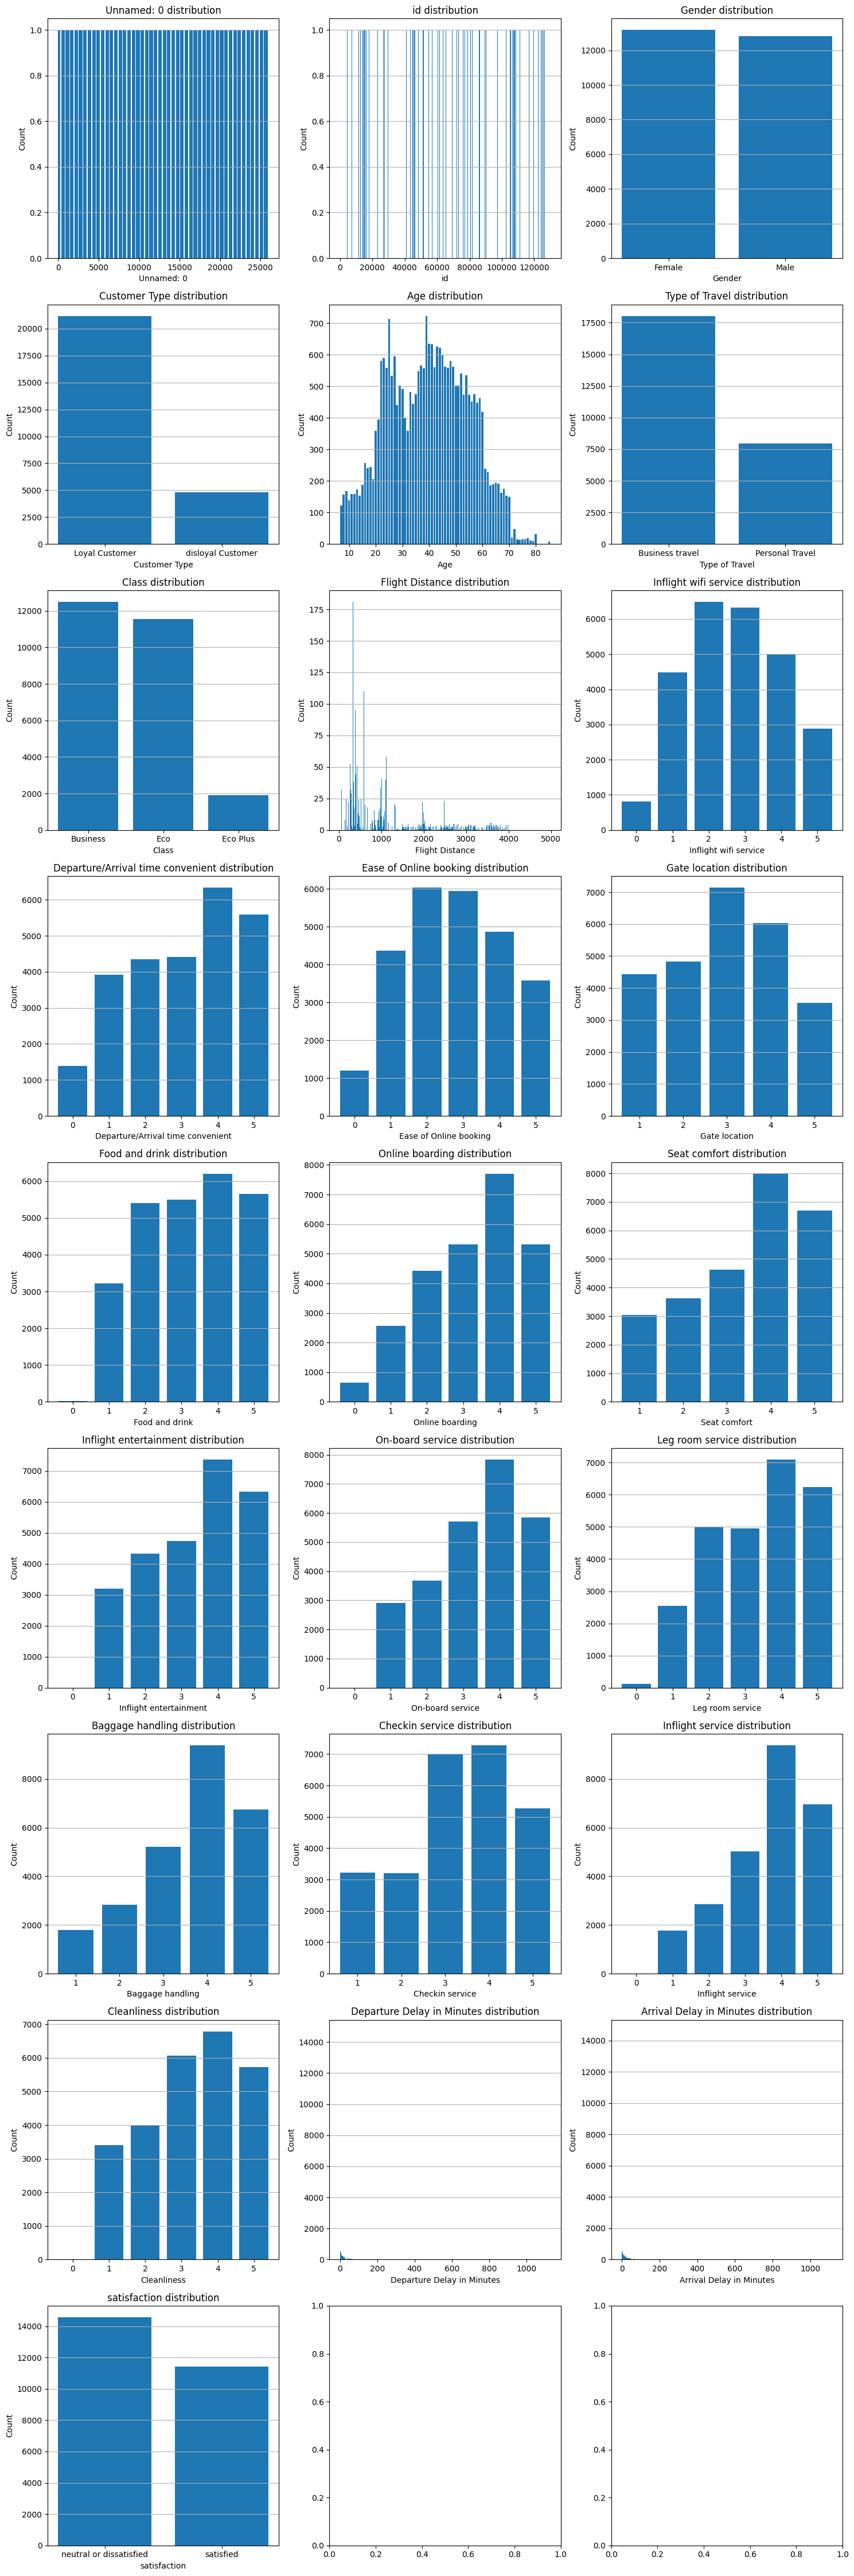

In [149]:
bar_plot_value_counts(test_set, list(test_set.columns), 3)

Based on the above results and the provided dataset information, the following conclusions can be drawn:
1. There are 25976 rows of passenger data without any duplications.
2. As it was in the training dataset, there is only one column with missing values - **'Arrival_delay_in_minutes'** 
3. The test dataset includes all the same columns as the training dataset with the same feature distribution.

### 5.1.2. Deleting the 'Unnamed: 0' and 'id' columns

In [150]:
test_set.drop(labels = ['Unnamed: 0', 'id'], axis = 1, inplace = True)
test_set.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


### 5.1.3. Formatting column names and string values in one style

In [151]:
test_set.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [152]:
test_set = format_column_names_and_values(test_set)
test_set.head()

,Gender,Customer_type,Age,Type_of_travel,Class,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,...,Inflight_entertainment,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Satisfaction
0,Female,Loyal customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,Satisfied
1,Female,Loyal customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,Satisfied
2,Male,Disloyal customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,Neutral or dissatisfied
3,Male,Loyal customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,Satisfied
4,Female,Loyal customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,Satisfied


### 5.1.4. Feature encoding

#### 5.1.4.1. Encoding categorical features that have two unique values into 0 and 1

In [153]:
test_set = binary_replacement(test_set)

#### 5.1.4.2. Label Encoding of target values

In [154]:
test_set['Satisfaction'] = label_encoder.fit_transform(test_set['Satisfaction'])
test_set.head()

,Gender,Customer_type,Age,Type_of_travel,Class,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,...,Inflight_entertainment,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Satisfaction
0,1,0,52,1,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,0,36,1,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,0,1,20,1,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,0,0,44,1,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,1,0,49,1,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


### 5.1.5. Creating 'Class_fr' column

In [155]:
test_set['Class_fr'] = test_set['Class'].map(rounded_class_frequency_dict)
test_set.head()

,Gender,Customer_type,Age,Type_of_travel,Class,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,...,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Satisfaction,Class_fr
0,1,0,52,1,Eco,160,5,4,3,4,...,5,5,5,2,5,5,50,44.0,1,0.45
1,1,0,36,1,Business,2863,1,1,3,1,...,4,4,4,3,4,5,0,0.0,1,0.48
2,0,1,20,1,Eco,192,2,0,2,4,...,4,1,3,2,2,2,0,0.0,0,0.45
3,0,0,44,1,Business,3377,0,0,0,2,...,1,1,1,3,1,4,0,6.0,1,0.48
4,1,0,49,1,Eco,1182,2,3,4,3,...,2,2,2,4,2,4,0,20.0,1,0.45


### 5.1.6. Creating new column 'Age_groups' and exclude 'Age' column

In [156]:
test_set['Age_groups'] = age_group(test_set, age_bins_big, age_labels_big)
test_set.drop('Age', axis = 1, inplace = True)
test_set.head()

,Gender,Customer_type,Type_of_travel,Class,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,...,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Satisfaction,Class_fr,Age_groups
0,1,0,1,Eco,160,5,4,3,4,3,...,5,5,2,5,5,50,44.0,1,0.45,7
1,1,0,1,Business,2863,1,1,3,1,5,...,4,4,3,4,5,0,0.0,1,0.48,5
2,0,1,1,Eco,192,2,0,2,4,2,...,1,3,2,2,2,0,0.0,0,0.45,2
3,0,0,1,Business,3377,0,0,0,2,3,...,1,1,3,1,4,0,6.0,1,0.48,6
4,1,0,1,Eco,1182,2,3,4,3,4,...,2,2,4,2,4,0,20.0,1,0.45,6


### 5.1.7. Creating 'XOR_Customer_Travel' column

In [157]:
test_set['XOR_Customer_Travel'] = test_set['Customer_type'] ^ test_set['Type_of_travel']
test_set.head()

,Gender,Customer_type,Type_of_travel,Class,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,...,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Satisfaction,Class_fr,Age_groups,XOR_Customer_Travel
0,1,0,1,Eco,160,5,4,3,4,3,...,5,2,5,5,50,44.0,1,0.45,7,1
1,1,0,1,Business,2863,1,1,3,1,5,...,4,3,4,5,0,0.0,1,0.48,5,1
2,0,1,1,Eco,192,2,0,2,4,2,...,3,2,2,2,0,0.0,0,0.45,2,0
3,0,0,1,Business,3377,0,0,0,2,3,...,1,3,1,4,0,6.0,1,0.48,6,1
4,1,0,1,Eco,1182,2,3,4,3,4,...,2,4,2,4,0,20.0,1,0.45,6,1


## 5.2. Testing the best model

In [158]:
y_test_set = test_set.Satisfaction
test_set.drop('Satisfaction', axis = 1, inplace = True)
test_set.head()

,Gender,Customer_type,Type_of_travel,Class,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,...,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Class_fr,Age_groups,XOR_Customer_Travel
0,1,0,1,Eco,160,5,4,3,4,3,...,5,5,2,5,5,50,44.0,0.45,7,1
1,1,0,1,Business,2863,1,1,3,1,5,...,4,4,3,4,5,0,0.0,0.48,5,1
2,0,1,1,Eco,192,2,0,2,4,2,...,1,3,2,2,2,0,0.0,0.45,2,0
3,0,0,1,Business,3377,0,0,0,2,3,...,1,1,3,1,4,0,6.0,0.48,6,1
4,1,0,1,Eco,1182,2,3,4,3,4,...,2,2,4,2,4,0,20.0,0.45,6,1


In [168]:
y_pred = best_model.predict(test_set[columns_add_14])

f1 = f1_score(y_test_set, y_pred)
f1

0.9592073551727217

# 6. Preparation for model deployment
## 6.1. Creating a dictionary to map original values with the numeric representation

As I trained my model with binary encoded values in the 'Customer_type' and 'Type_of_travel' and new features - 'Calss_fr' and 'Age_groups',  I need all unique values from the abovementioned columns for proper model deployment.
I already have a dictionary with class frequency - rounded_class_frequency_dict, so I will only create a separate dictionary to map unique values from the 'Customer_type' and 'Type_of_travel' columns with their binary representation and a separate dictionary with Age_groups.

In [172]:
rounded_class_frequency_dict

{'Business': 0.48, 'Eco': 0.45, 'Eco plus': 0.07}

In [173]:
binary_variables_dict = {'Loyal customer':0, 'Disloyal customer':1, 'Personal travel':0, 'Business travel':1}
binary_variables_dict

{'Loyal customer': 0,
 'Disloyal customer': 1,
 'Personal travel': 0,
 'Business travel': 1}

In [174]:
deployment_dict_encoded_var = rounded_class_frequency_dict | binary_variables_dict
deployment_dict_encoded_var

{'Business': 0.48,
 'Eco': 0.45,
 'Eco plus': 0.07,
 'Loyal customer': 0,
 'Disloyal customer': 1,
 'Personal travel': 0,
 'Business travel': 1}

## 6.2. Creating a dictionary with aging groups and labels

In [175]:
# age_bins_big [0, 14, 19, 21, 27, 35, 40, 50, 60, 69, float('inf')]
# age_labels_big [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

age_group_dict = {}
number_of_bins = len(age_bins_big)
for i in range(0, number_of_bins-1):
    min_age = age_bins_big[i]+1
    max_age = age_bins_big[i+1]
    age_group_dict[(min_age, max_age)] = age_labels_big[i]

age_group_dict

{(1, 14): 1,
 (15, 19): 2,
 (20, 21): 3,
 (22, 27): 4,
 (28, 35): 5,
 (36, 40): 6,
 (41, 50): 7,
 (51, 60): 8,
 (61, 69): 9,
 (70, inf): 10}

## 6.3. Saving the model and necessary variables for deployment

In [176]:
flask_output_file = 'flask_airline_best_model_12.02.2024.bin'

In [177]:
with open(flask_output_file, 'wb') as f_out: 
    joblib.dump((deployment_dict_encoded_var, age_group_dict, best_model), f_out)